In [50]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [73]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [154]:
import re
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [52]:
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25)

font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 25}

matplotlib.rc('font', **font)

In [53]:
# load reference solutions
path = '../02_Data/'

BOR_BOW_REF    = []
BOR_CENTER_REF = []
BOR_STERN_REF  = []
BOR_WAKE_REF   = []

BOW_REF    = [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1]
CENTER_REF = [4.27, 4.37, 4.47, 4.57, 4.67, 4.77, 4.87, 4.97, 5.07, 5.17, 5.27, 5.37, 5.47]
STERN_REF  = [8.67, 8.92, 9.17, 9.42, 9.67, 9.92, 10.17, 10.42, 10.67, 10.92, 11.17, 11.42, 11.67, 11.92, 12.17]
WAKE_REF   = [12.9167, 13.17, 13.4167, 13.67, 13.9167, 14.17, 14.4167, 14.67, 14.9167, 15.17, 15.4167, 15.67, 15.9167, 16.17, 16.4167]
ALL_REF    = np.concatenate([BOW_REF, CENTER_REF, STERN_REF, WAKE_REF])

for f in BOW_REF:
    BOR_BOW_REF.append(np.loadtxt(path+'XoR_'+str(f)+'.xy'))
    
for f in CENTER_REF:
    BOR_CENTER_REF.append(np.loadtxt(path+'XoR_'+str(f)+'.xy'))
    
for f in STERN_REF:
    BOR_STERN_REF.append(np.loadtxt(path+'XoR_'+str(f)+'.xy'))

for f in WAKE_REF:
    BOR_WAKE_REF.append(np.loadtxt(path+'XoR_'+str(f)+'.xy'))

In [54]:
root  = "../03_Training/BOR-in-the-loop_STERN/"
root_ = "../03_Training/"

In [125]:
!ls ../03_Training/BOR-in-the-loop_STERN

reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100
velocity_I1_I2_MAPE_C1_8_100
velocity_reynolds_stress_I1_I2_MAPE_C1_8_100
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC
velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_added_ops
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R
velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100
wall_shear_stress_I1_I2_MAPE_C1_8_100


In [56]:
path = "reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U = []
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [57]:
path = "reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U = []
reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [58]:
path = "velocity_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_I1_I2_MAPE_C1_8_100_U = []
velocity_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        velocity_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [59]:
path = "velocity_reynolds_stress_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U = []
velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [60]:
path = "velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U = []
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [61]:
path = "velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC/running_pfac150_pop12_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U = []
velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_R.append(np.loadtxt(root+path+'XoRm0.1_Rall.xy')) 
    elif(f==0.0):
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_R.append(np.loadtxt(root+path+'XoR0.0_Rall.xy')) 
    else:
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_Rall.xy'))

In [62]:
path = "velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U = []
velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [63]:
path = "velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U = []
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [64]:
path = "velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U = []
velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [65]:
path = "wall_shear_stress_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
wall_shear_stress_I1_I2_MAPE_C1_8_100_U = []
wall_shear_stress_I1_I2_MAPE_C1_8_100_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        wall_shear_stress_I1_I2_MAPE_C1_8_100_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        wall_shear_stress_I1_I2_MAPE_C1_8_100_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [82]:
path = "velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R/running_pfac150_pop8_seed0/run_best/BOR/postProcessing/sampleDict/2000/"
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_U = []
velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_R = []
for i in range(0, len(STERN_REF)):
    f = STERN_REF[i]
    
    if(f==-0.1):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_U.append(np.loadtxt(root+path+'XoRm0.1_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_R.append(np.loadtxt(root+path+'XoRm0.1_R.xy')) 
    elif(f==0.0):
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_U.append(np.loadtxt(root+path+'XoR0.0_U.xy')) 
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_R.append(np.loadtxt(root+path+'XoR0.0_R.xy')) 
    else:
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_U.append(np.loadtxt(root+path+'XoRp'+str(f)+'_U.xy'))
        velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_R.append(np.loadtxt(root+path+'XoRp'+str(f)+'_R.xy'))

In [67]:
path = 'BOR_STERN_U_pop100_gen100/running_pfac150_pop100_seed0/run_04961/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/2000/'
BOR_STERN_U = []
STERN       = [8.67, 8.92, 9.17, 9.42, 9.67, 9.92, 10.17, 10.42, 10.67, 10.92, 11.17, 11.42, 11.67, 11.92, 12.17]
for f in STERN:
    BOR_STERN_U.append(pd.read_csv(root_+path+'XoR'+str(f)+'_U.csv'))

path = "BOR_STERN_UVRxy_pop100_gen100/running_pfac150_pop100_seed0/run_02057/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/2000/"
BOR_STERN_UVRxy = []
for f in STERN:
    BOR_STERN_UVRxy.append(pd.read_csv(root_+path+'XoR'+str(f)+'_U.csv'))
    
path = "BOR_STERN_UVRxy_pop100_gen100_higher_IC_NEW/running_pfac150_pop10_seed0/run_00445/PH_2D_RANS_kOmegaSSTx/postProcessing/sets/2000/"
BOR_STERN_UVRxy_higher_IC_NEW = []
for f in STERN:
    BOR_STERN_UVRxy_higher_IC_NEW.append(pd.read_csv(root_+path+'XoR'+str(f)+'_U.csv'))      

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


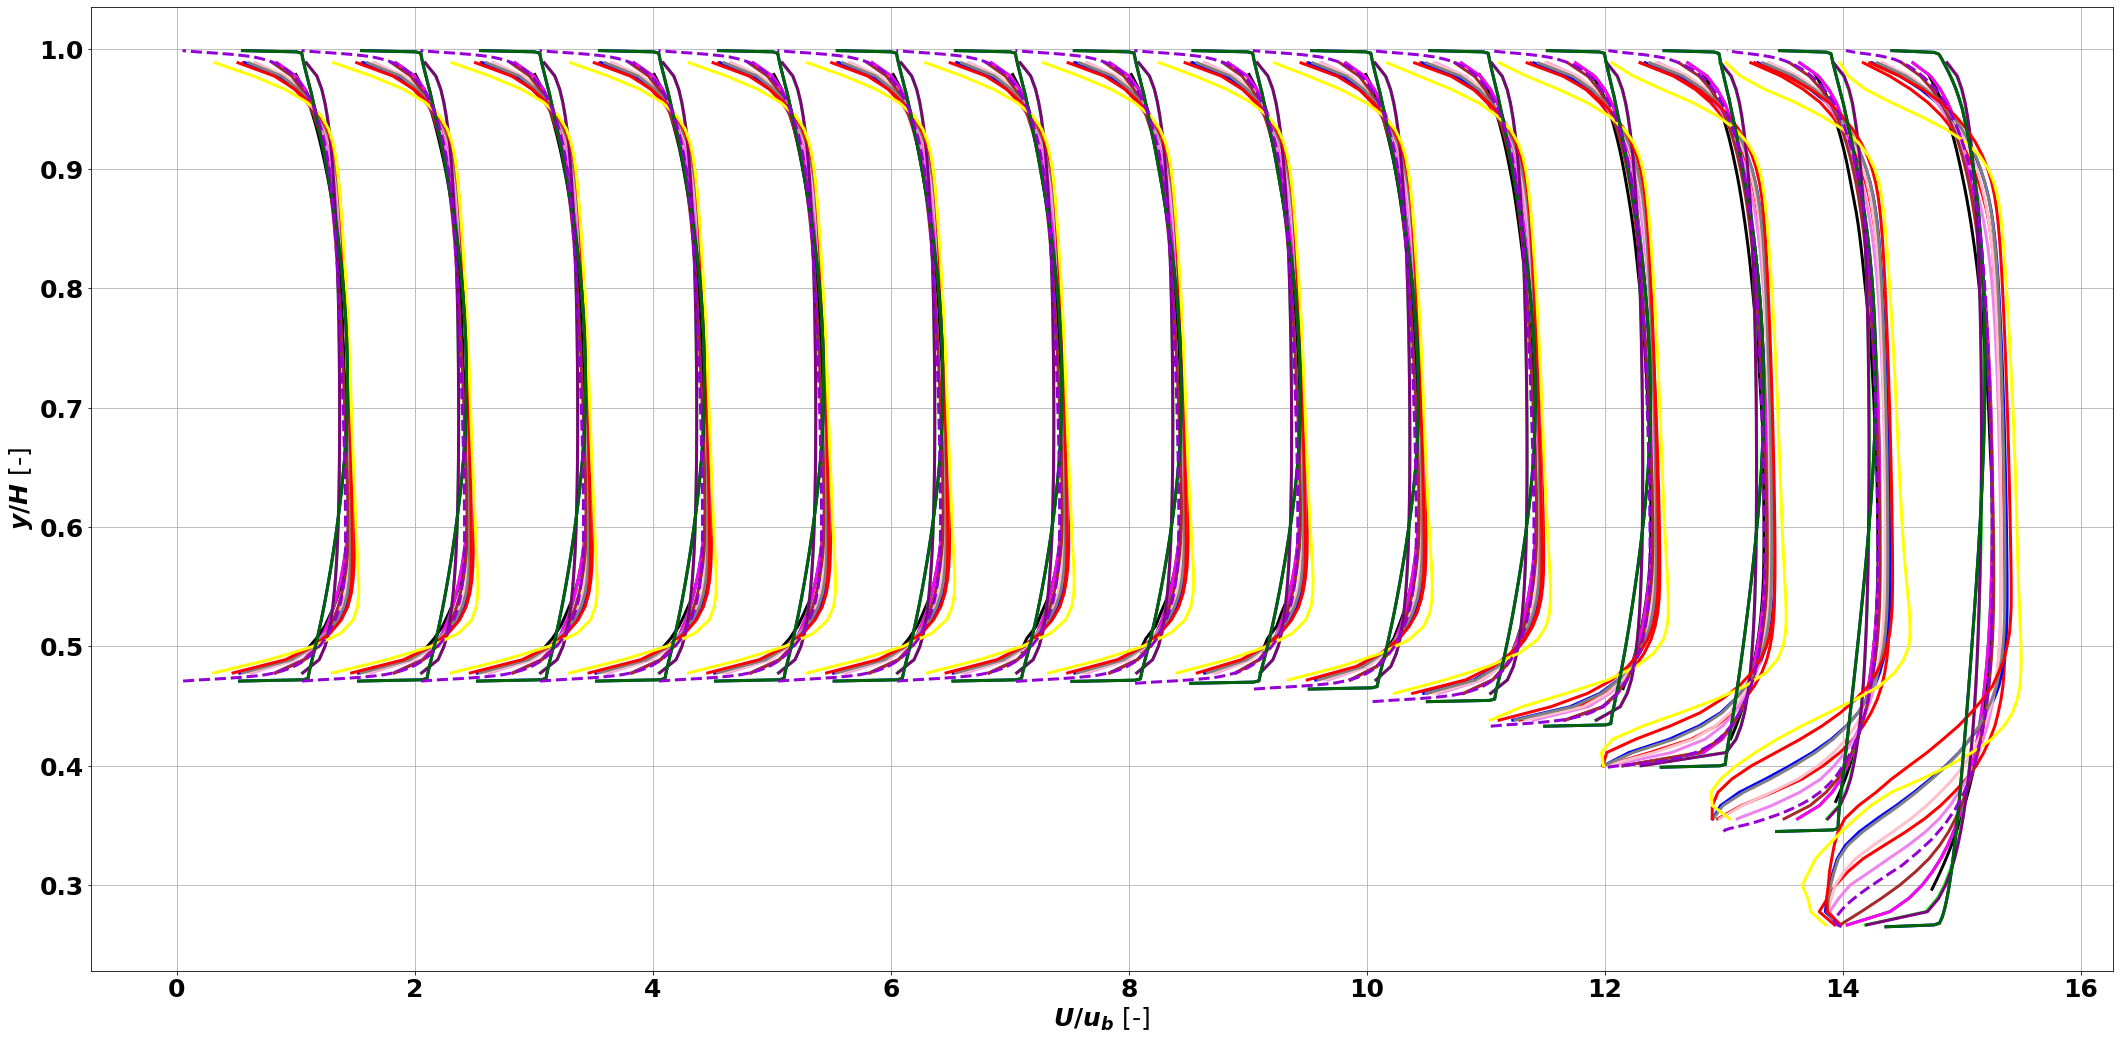

In [86]:
plt.figure(figsize=(30,15), frameon=False)
for i in range(0,len(STERN_REF)):
    print(i)
    
    velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U
    plt.plot(BOR_STERN_REF[i][:,3]+i,                                                          BOR_STERN_REF[i][:,1],                                                          c="black",   linewidth=3, label='REF.')
    plt.plot(reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                c="red",     linewidth=3, label='reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U')
    plt.plot(reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1]+i,             reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],             c="blue",    linewidth=3, label='reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U')
    plt.plot(velocity_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                                         velocity_I1_I2_MAPE_C1_8_100_U[i][:,0],                                         c="green",   linewidth=3, label='reynolds_stress_wall_shear_stress_I1_I2_ME_C1_16_200_U')
    plt.plot(velocity_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                                         velocity_I1_I2_MAPE_C1_8_100_U[i][:,0],                                         c="magenta", linewidth=3, label='velocity_I1_I2_MAPE_C1_8_100_U')
    plt.plot(velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                       velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                       c="lime",    linewidth=3, label='velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U')
    plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                         velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                         c="violet",  linewidth=3, label='velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U')
    plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1]+i,                      velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],                      c="pink",    linewidth=3, label='velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U')
    plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U[i][:,1]/2.2+i,        velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U[i][:,0],            c="brown",   linewidth=3, label='velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U')
    plt.plot(velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U[i][:,1]+i, velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U[i][:,0], c="grey",    linewidth=3, label='velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U')
    plt.plot(velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1]+i,                    velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],                    c="purple",  linewidth=3, label='velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U')
    plt.plot(wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1]+i,                                wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                                c="red",     linewidth=3, label='wall_shear_stress_I1_I2_MAPE_C1_8_100_U')  
    plt.plot(velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_U[i][:,1]+i,                  velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_U[i][:,0],                  c="yellow",  linewidth=3, label='velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_no_R_U')  
    
    plt.plot(BOR_STERN_U[i]['U_0']+i,                                                          BOR_STERN_U[i]['y'],                                                            c='blue',       linewidth=3, label='BOR_STERN_U')
    plt.plot(BOR_STERN_U[i]['U_0']+i,                                                          BOR_STERN_U[i]['y'],                                                            c='darkgreen',  linewidth=3, label='BOR_STERN_U') 
    plt.plot(BOR_STERN_UVRxy_higher_IC_NEW[i]['U_0']/2.2+i,                                    BOR_STERN_UVRxy_higher_IC_NEW[i]['y'],                                          c='darkviolet', linewidth=3, linestyle='dashed',label='BOR_STERN_UVRxy_higher_IC_NEW')
    
plt.ylabel("$y/H$ [-]")
plt.xlabel("$U/u_{b}$ [-]")
plt.tight_layout()
plt.grid()
plt.show()
plt.close()

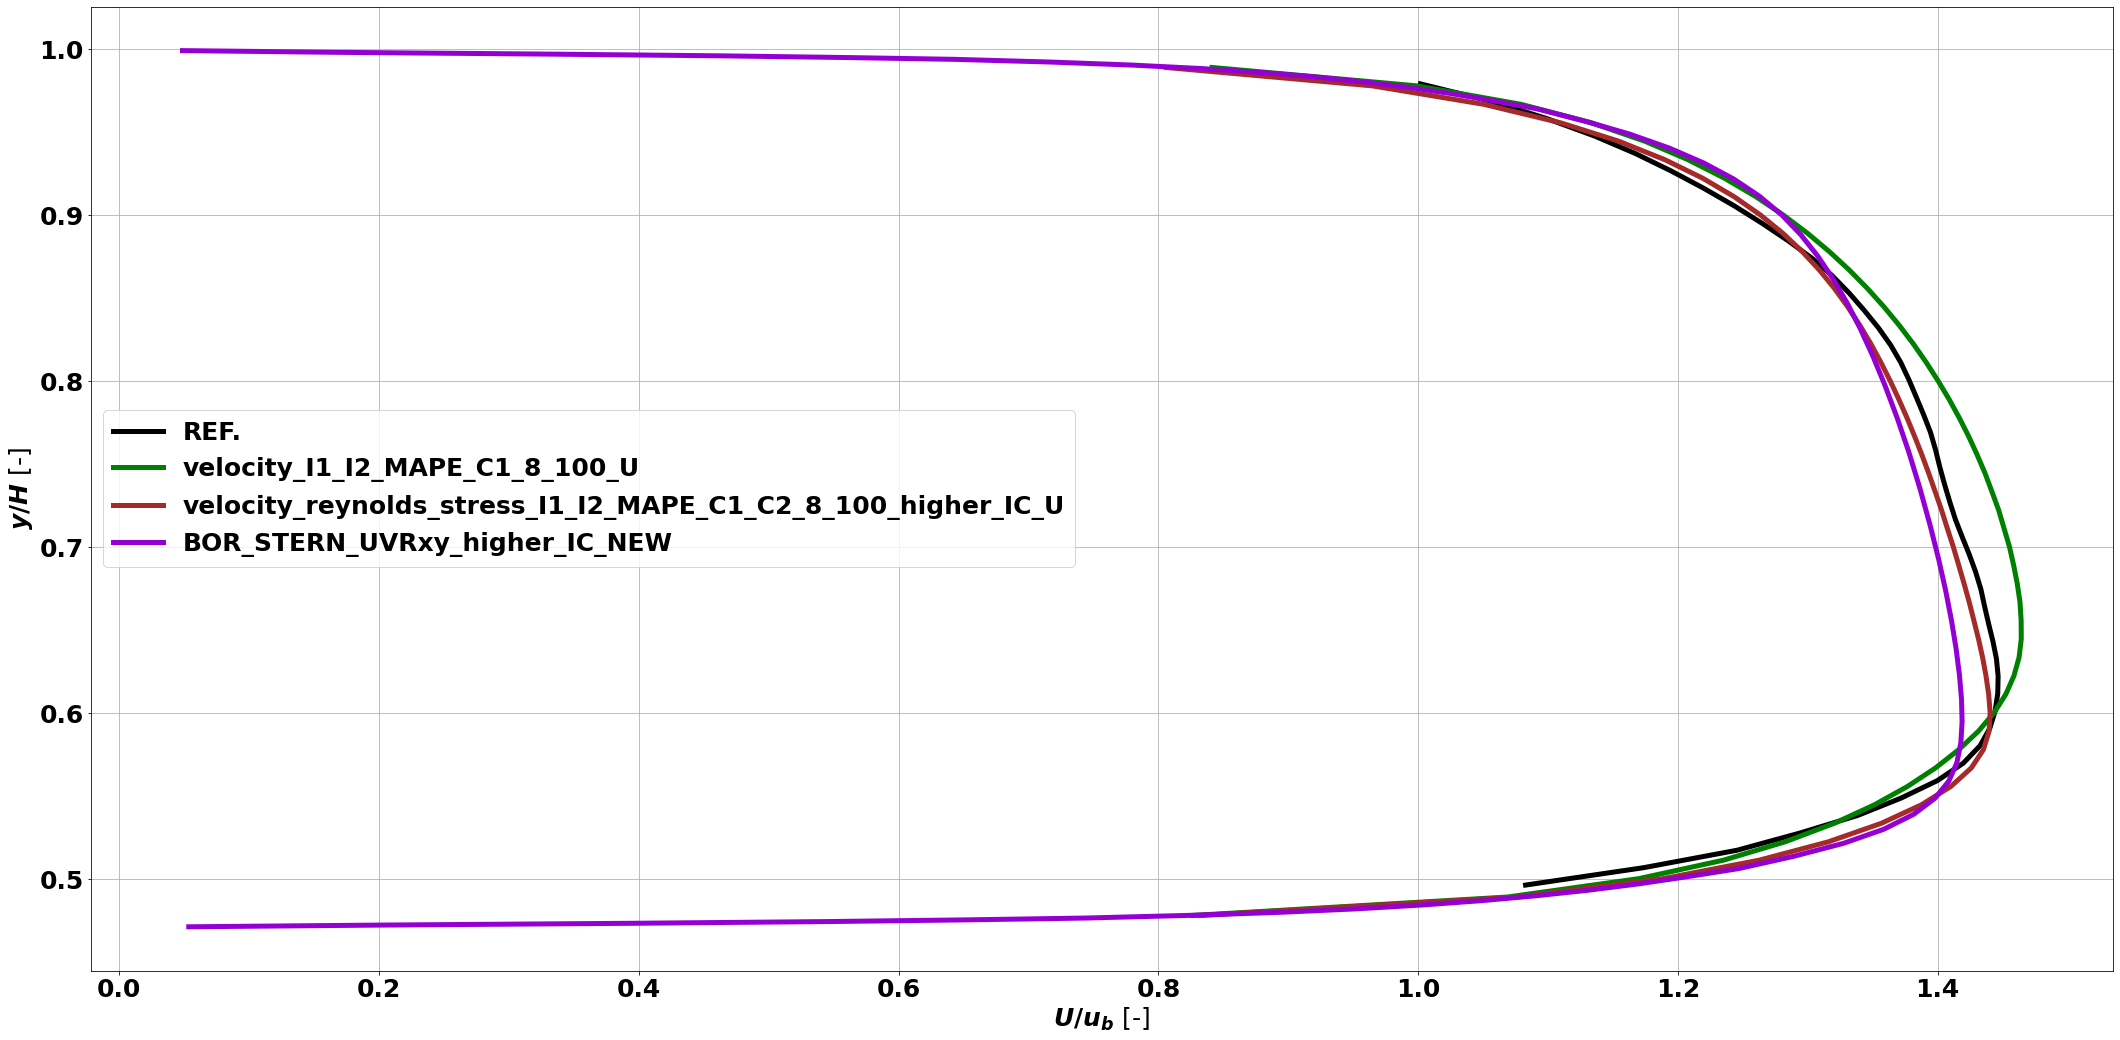

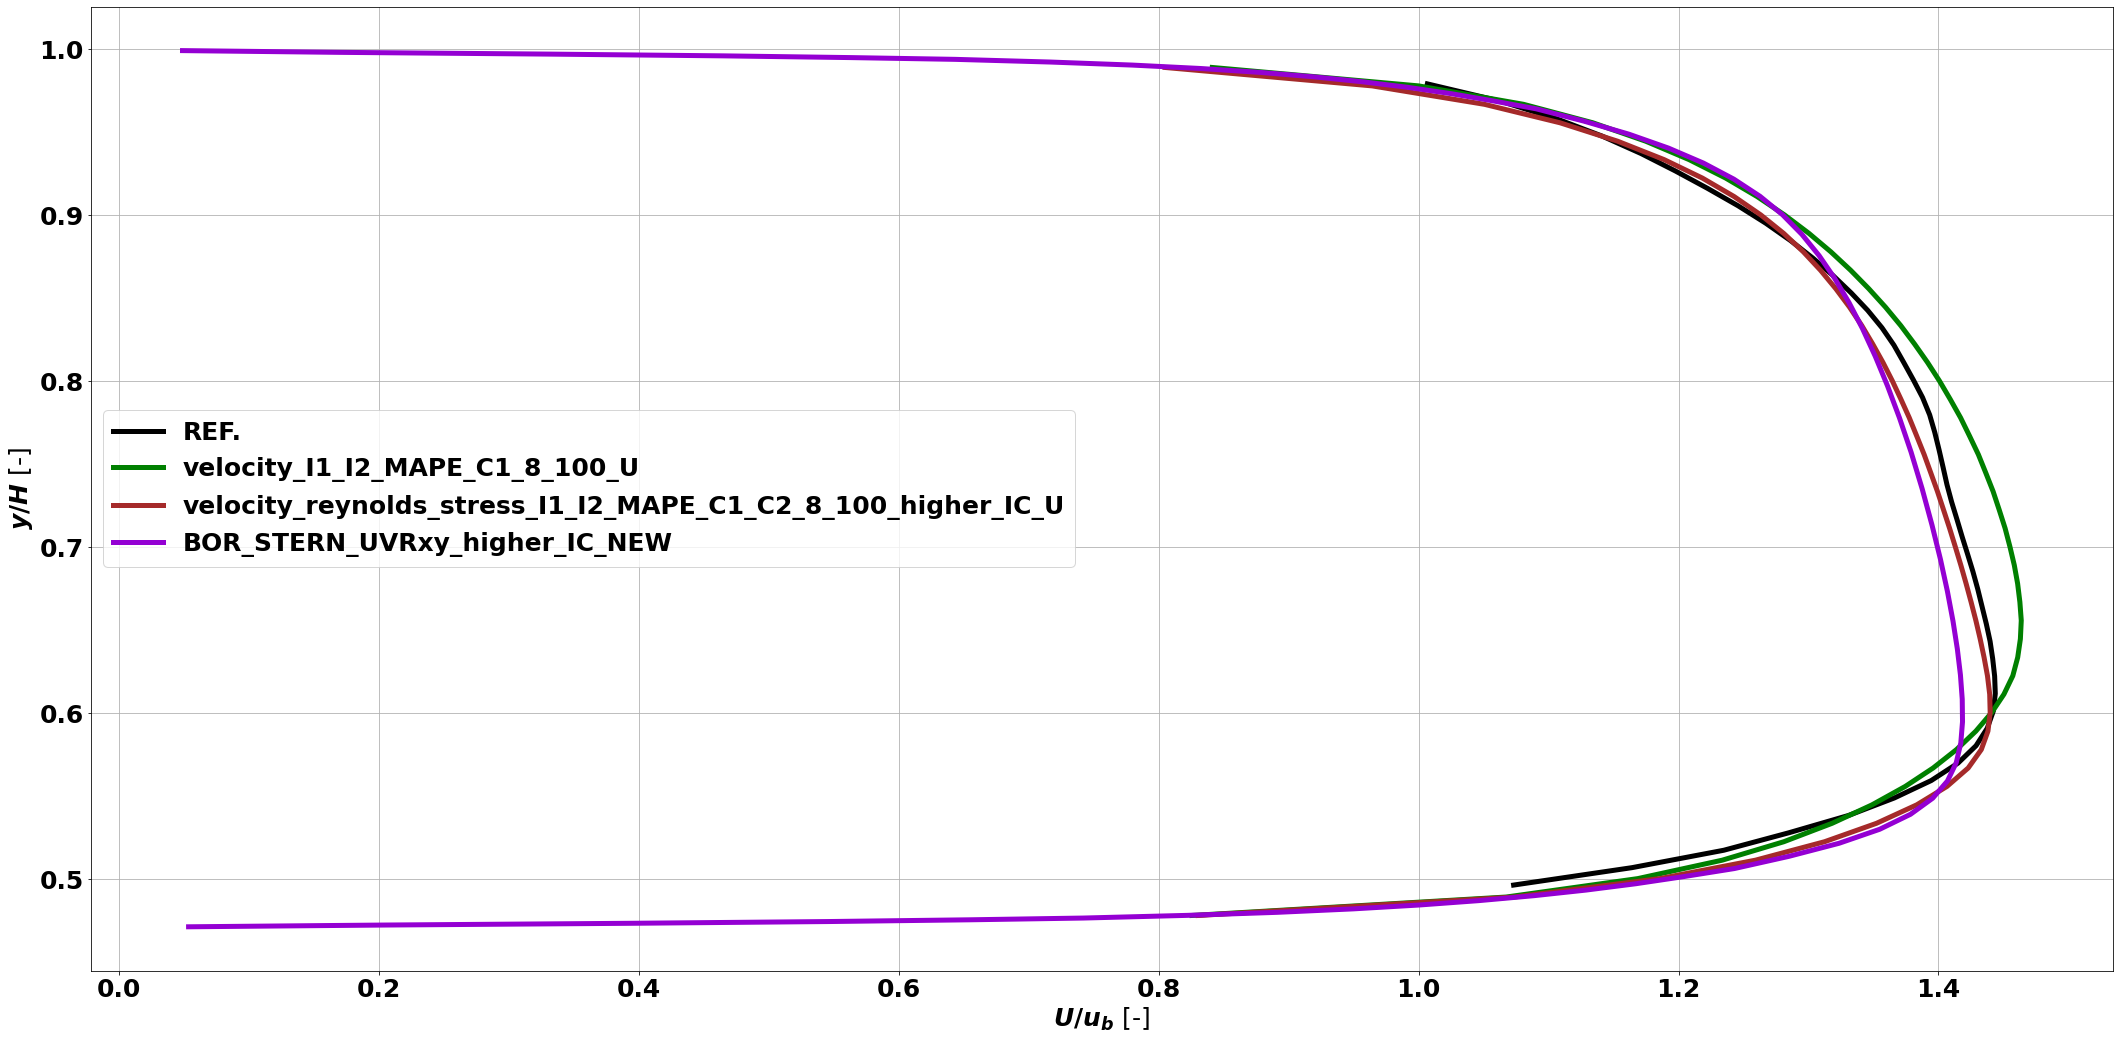

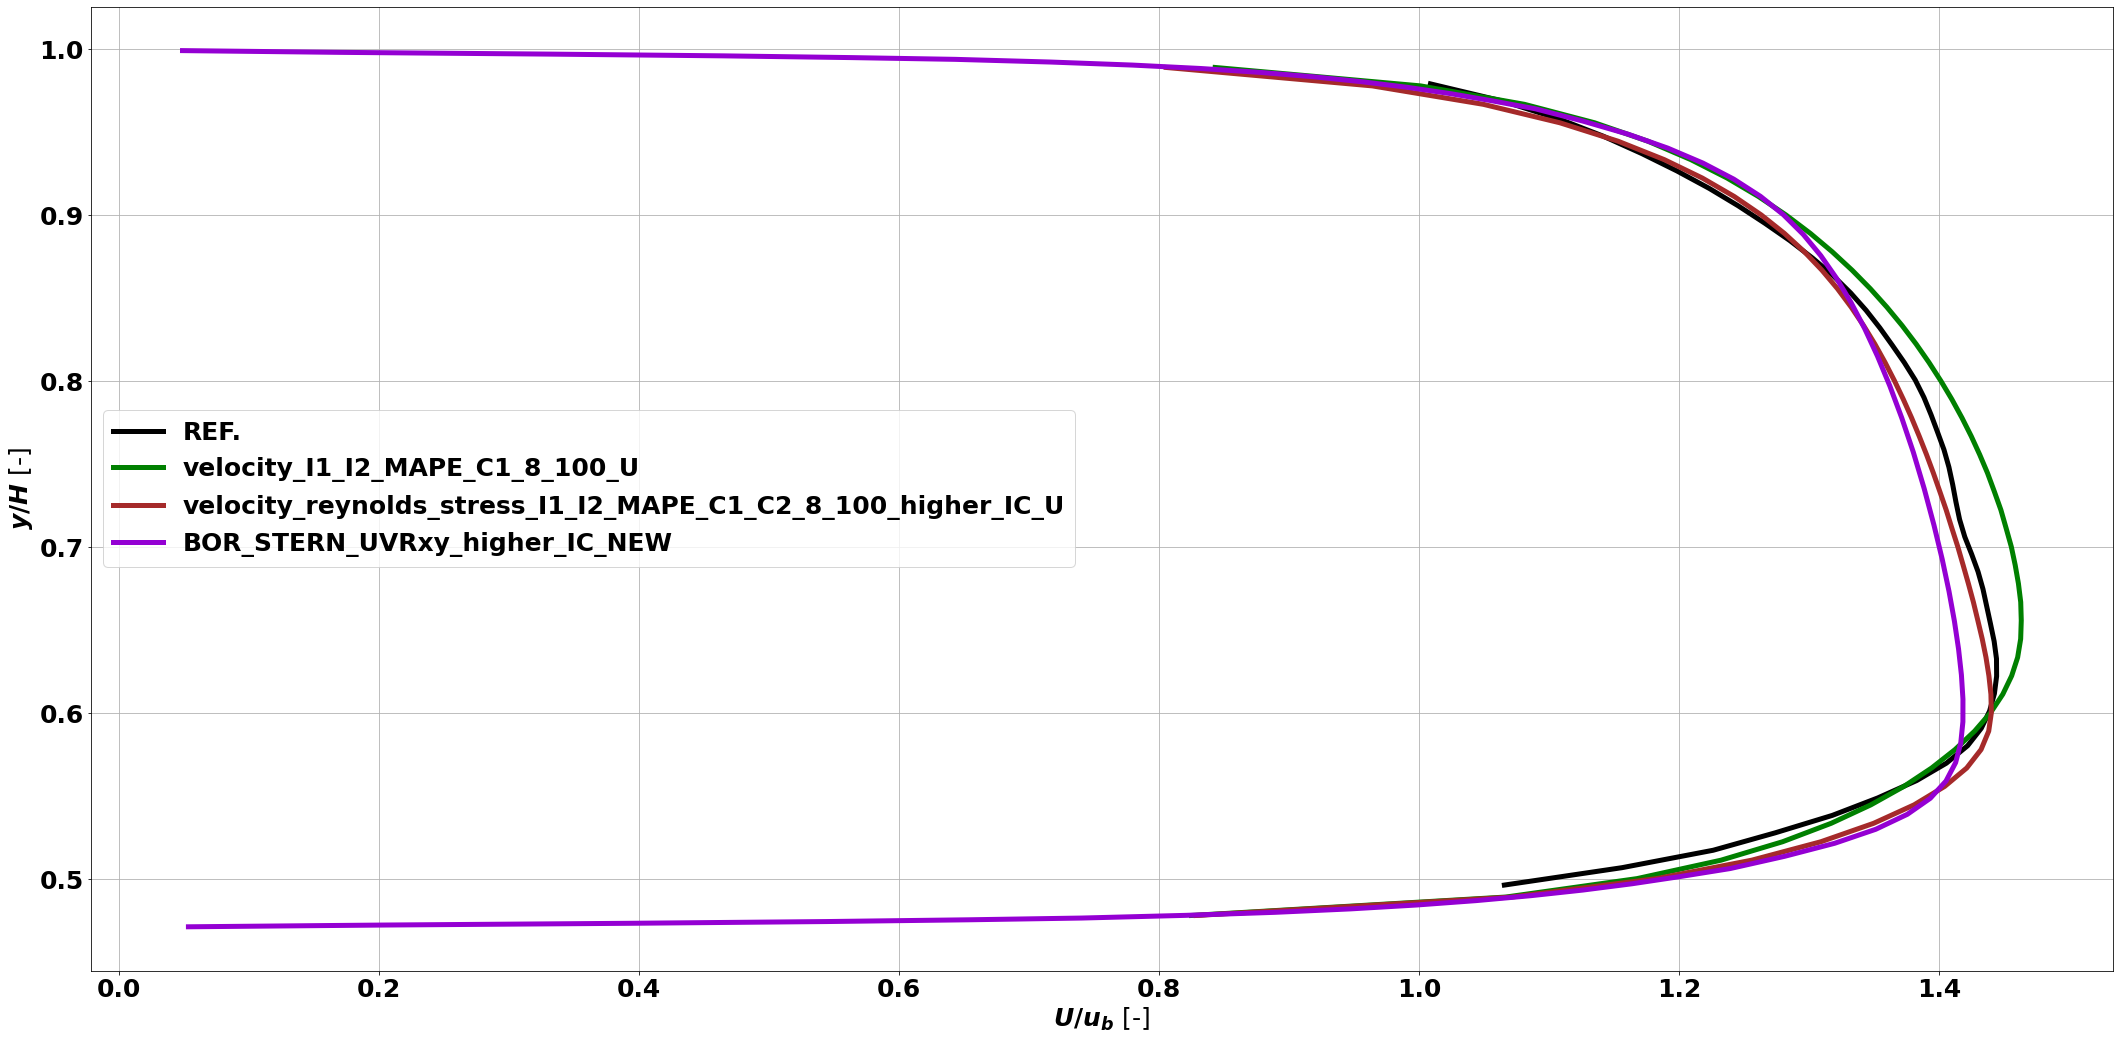

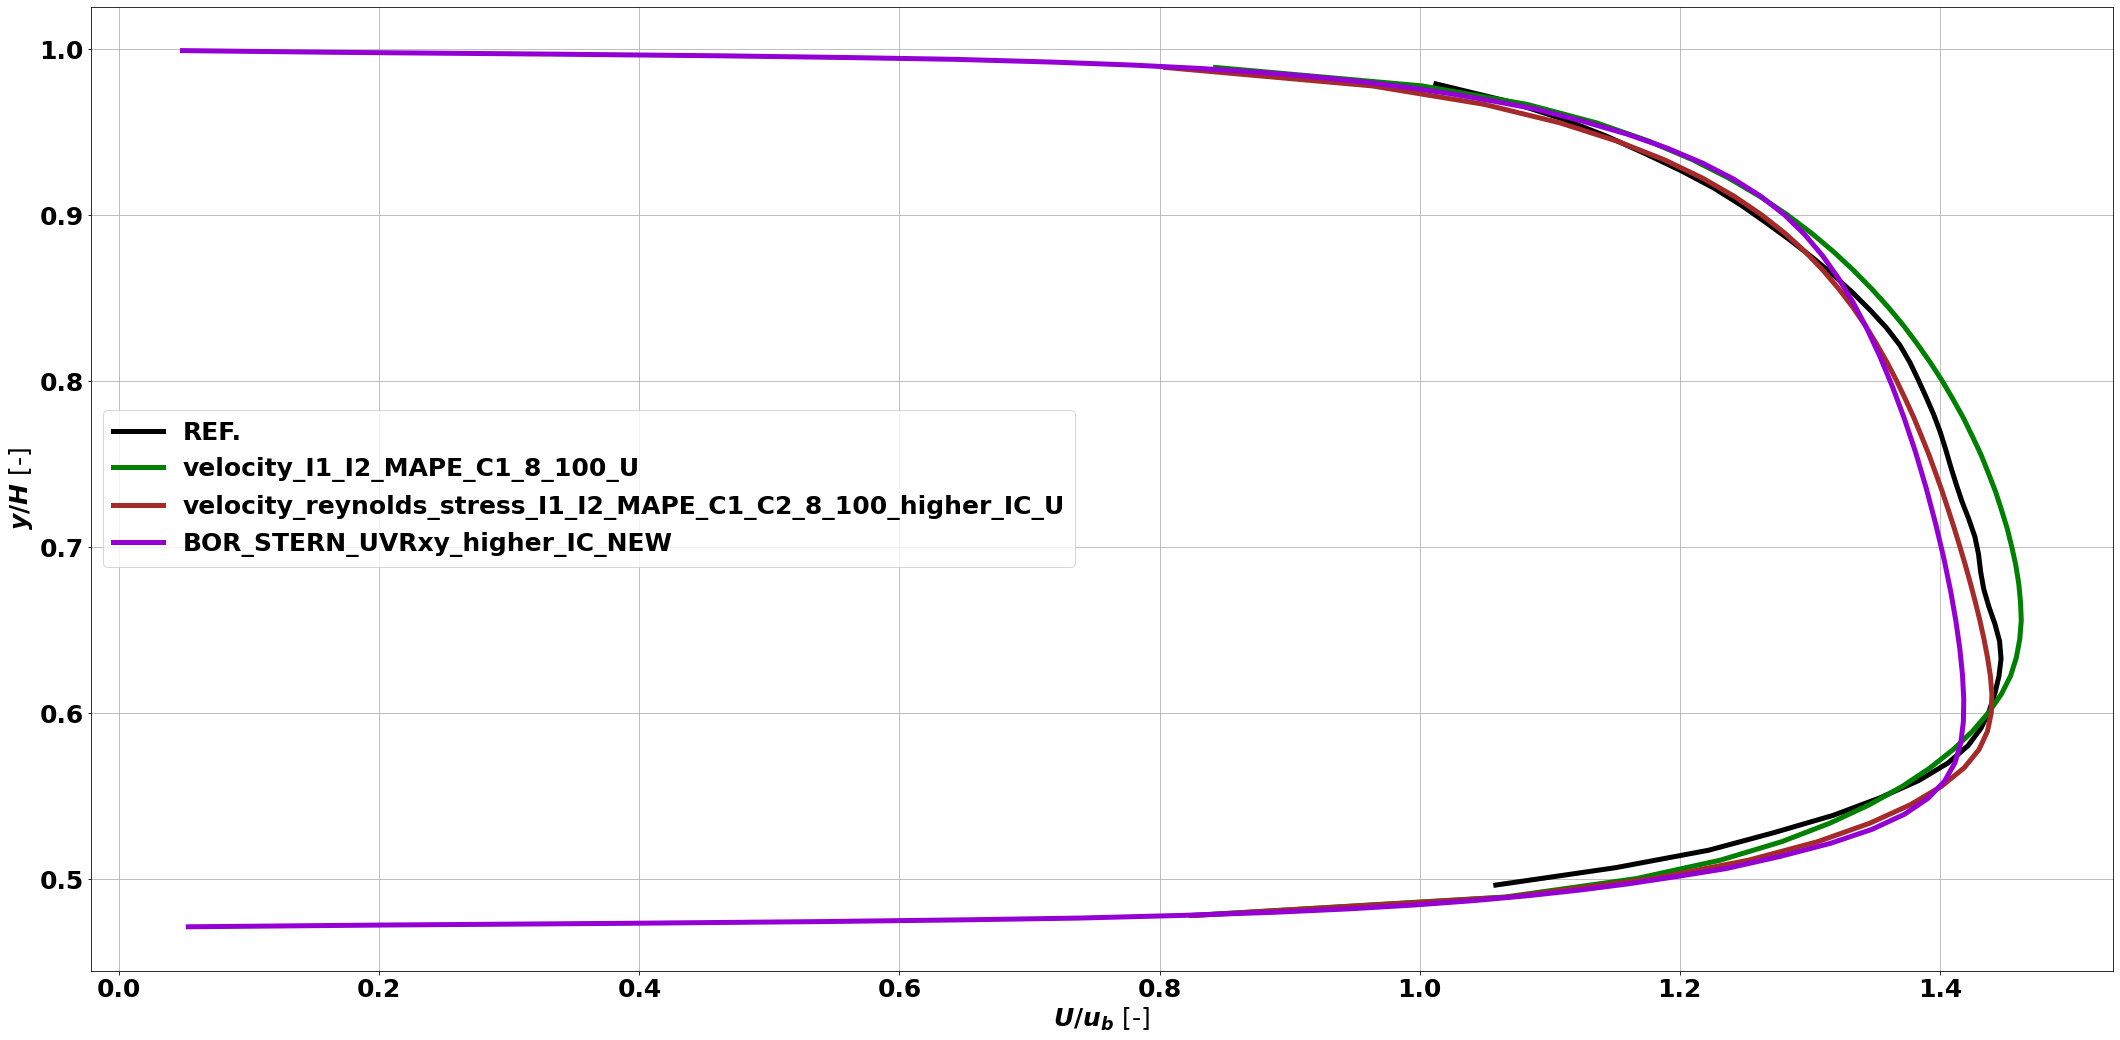

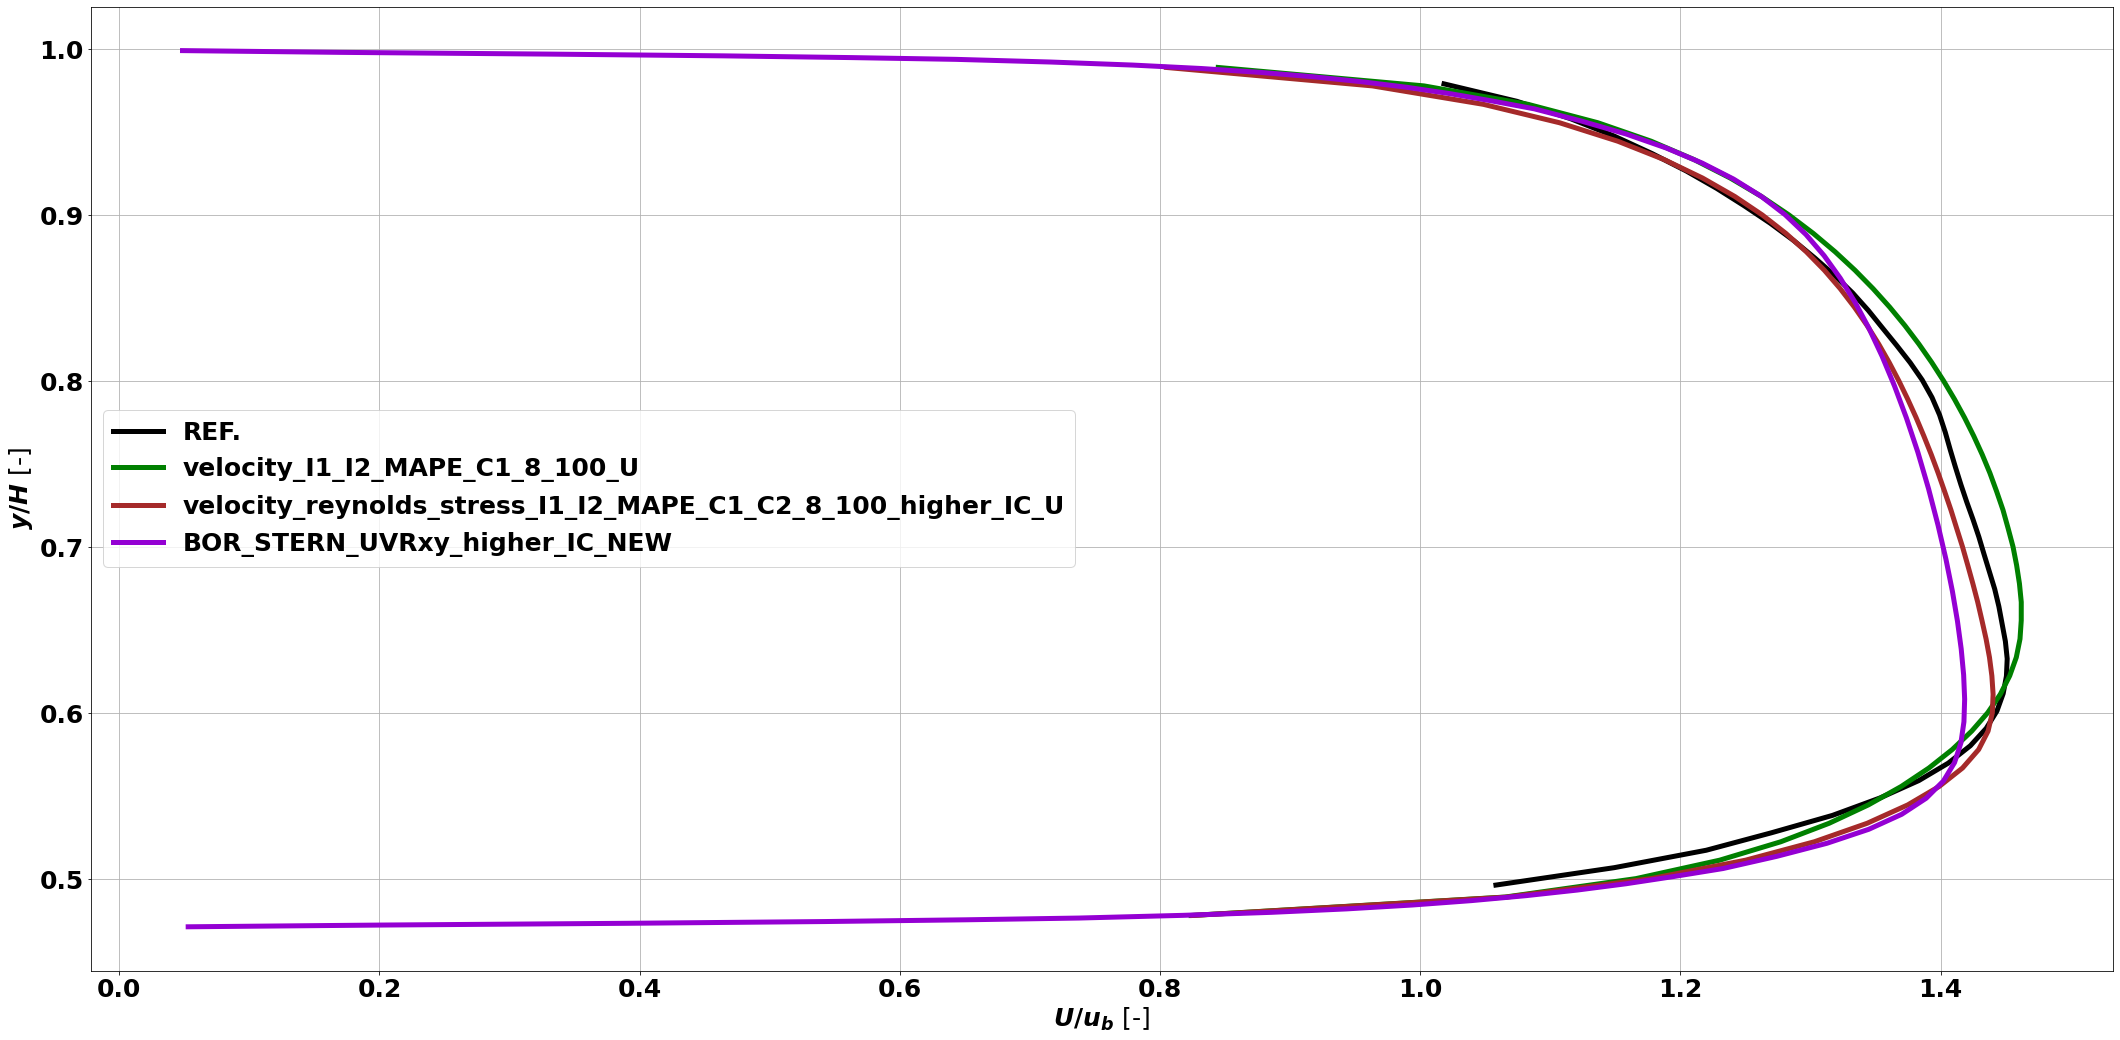

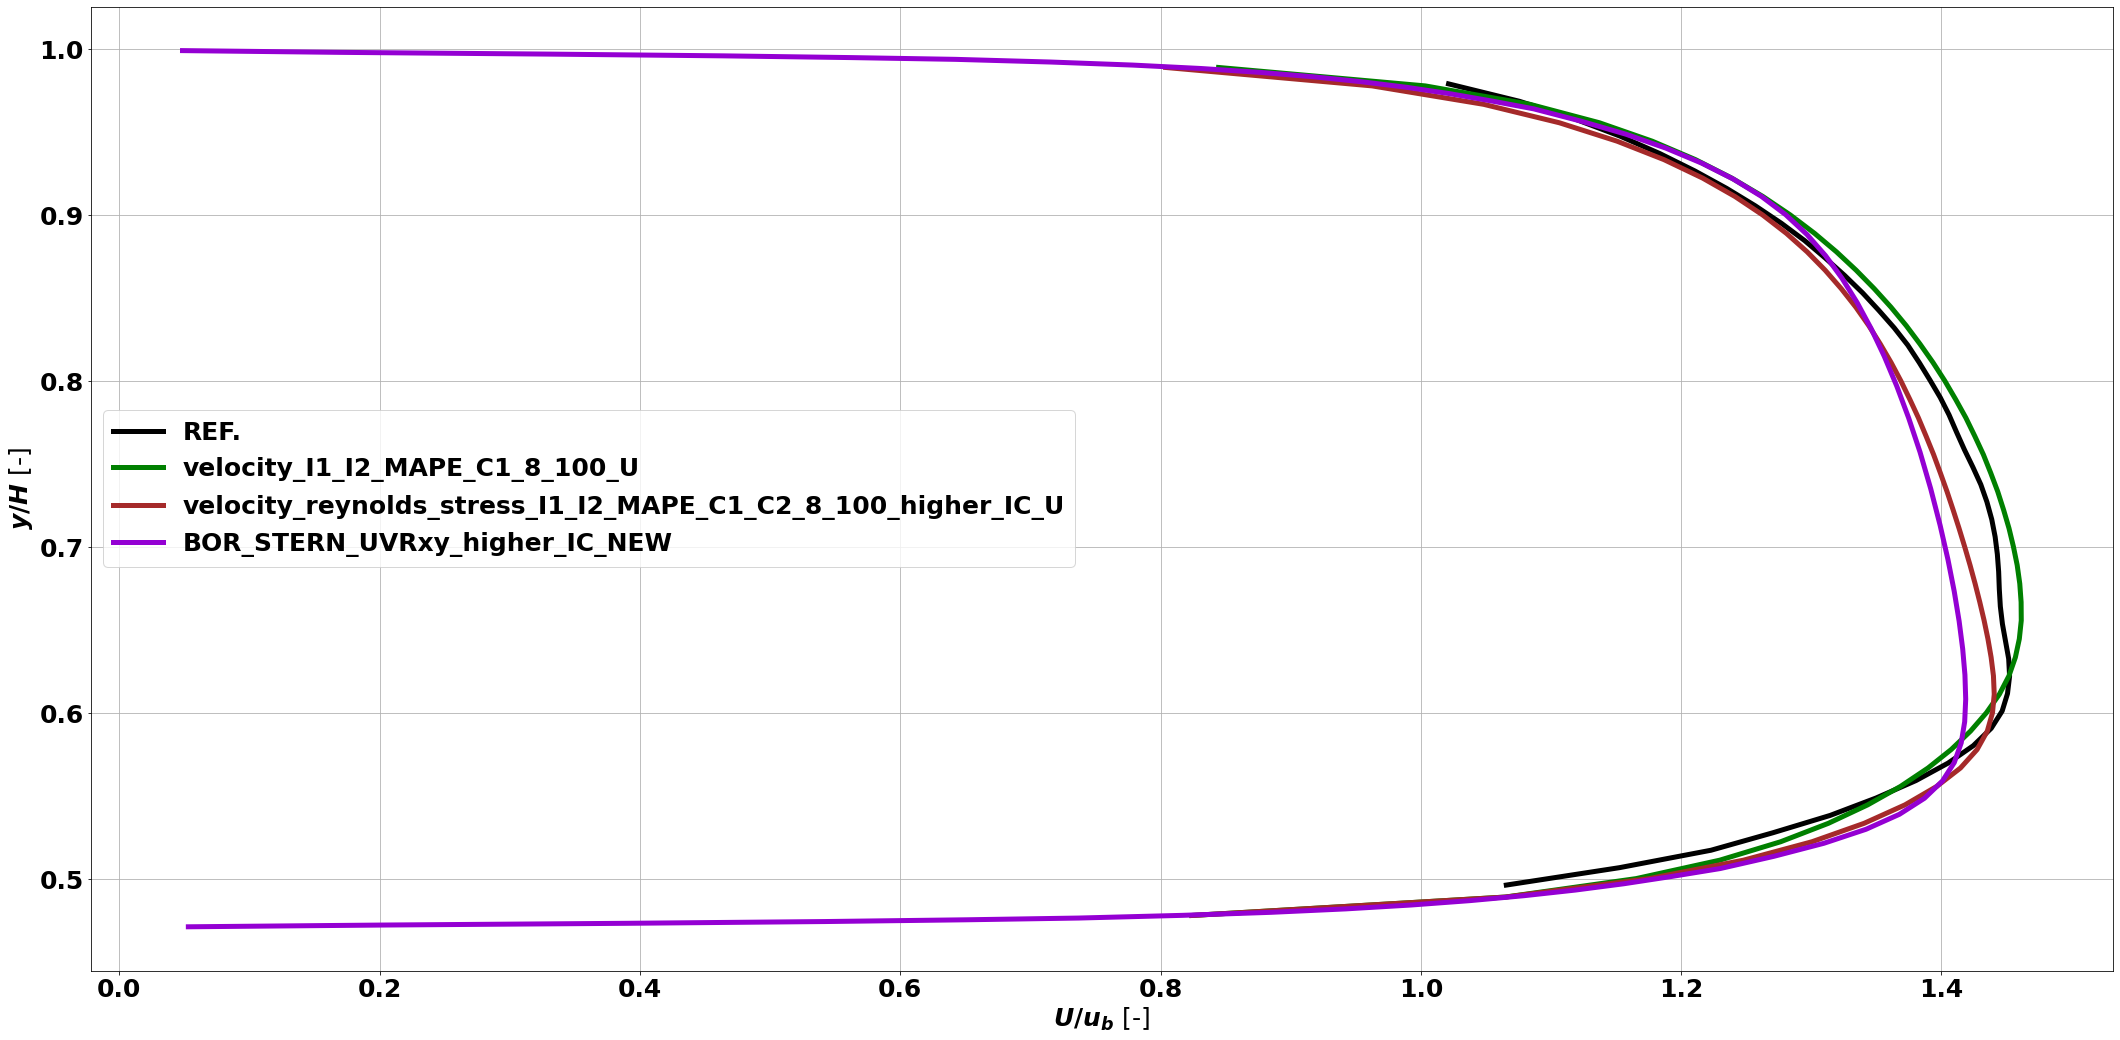

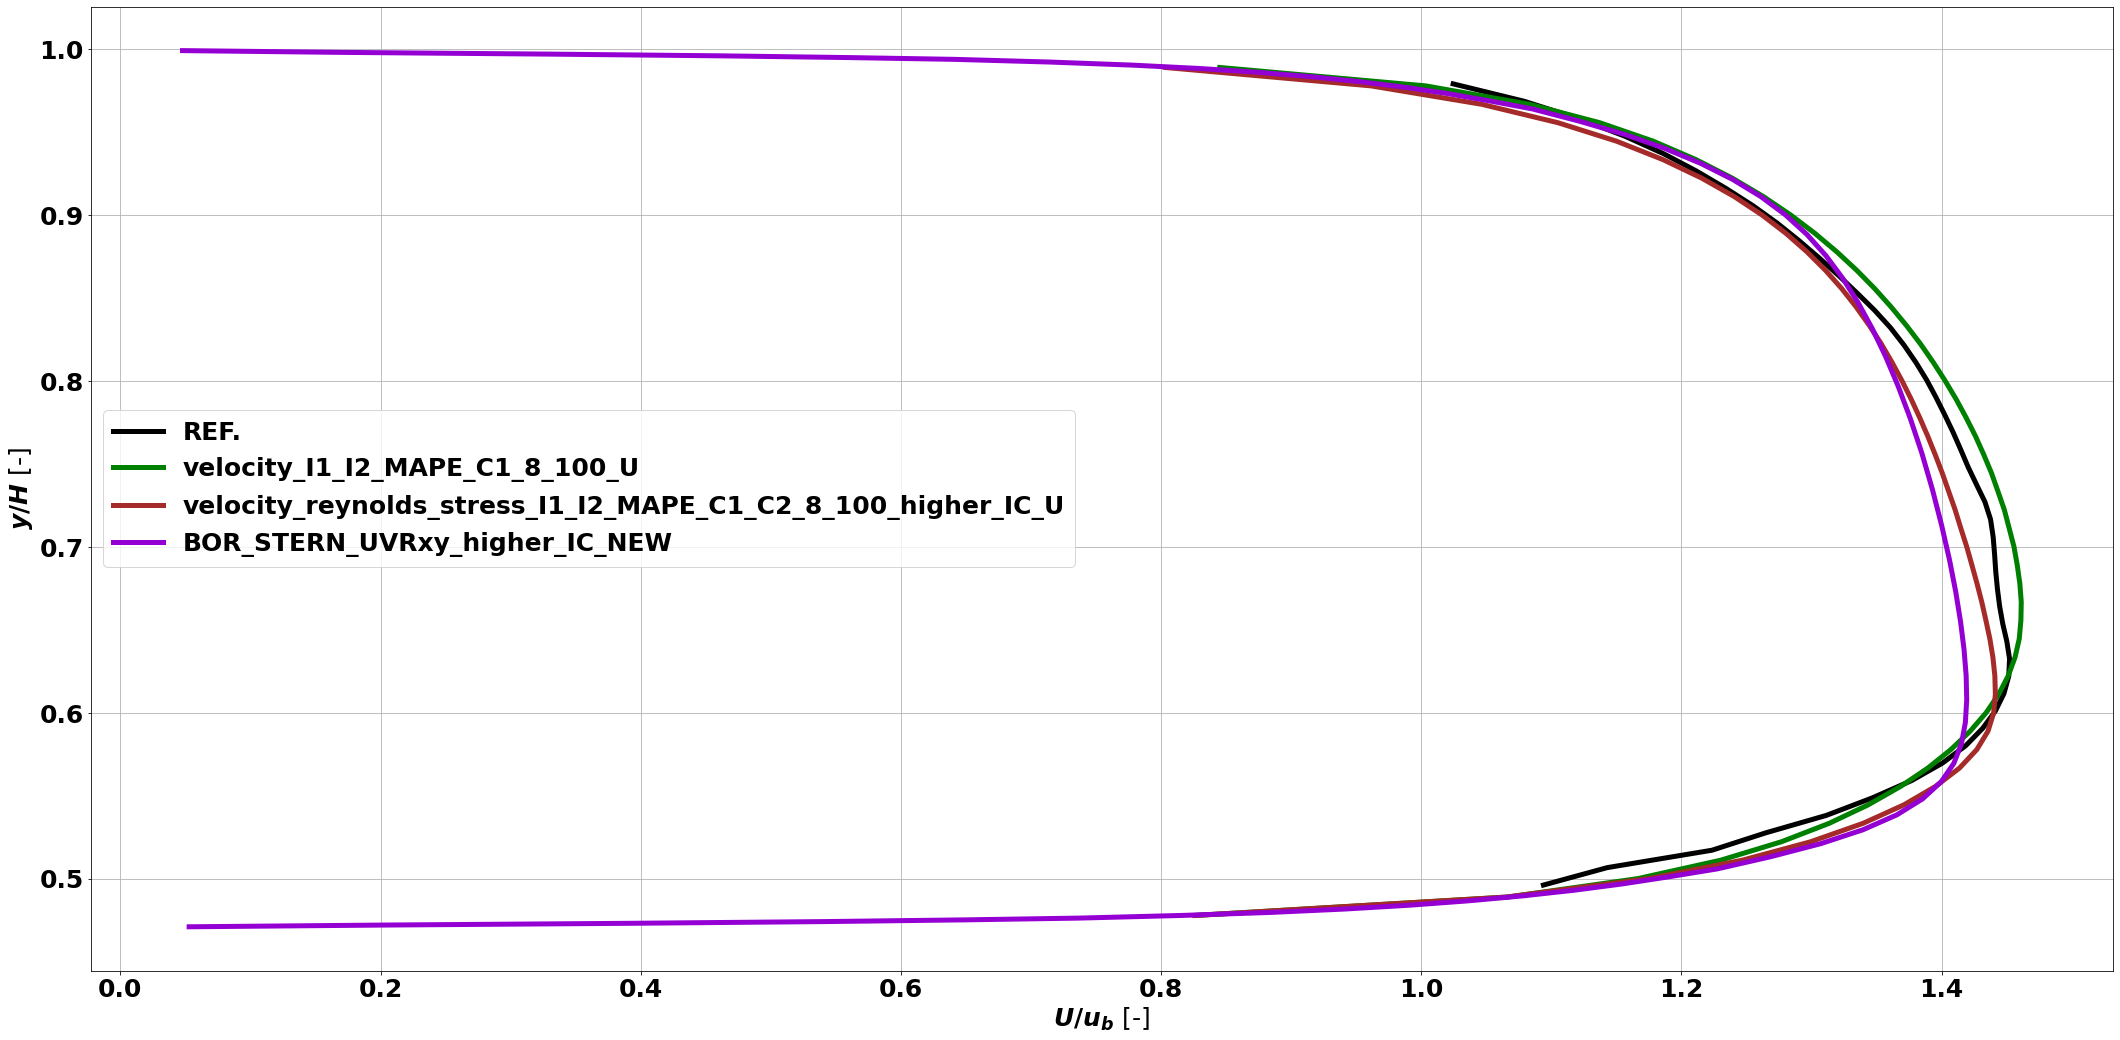

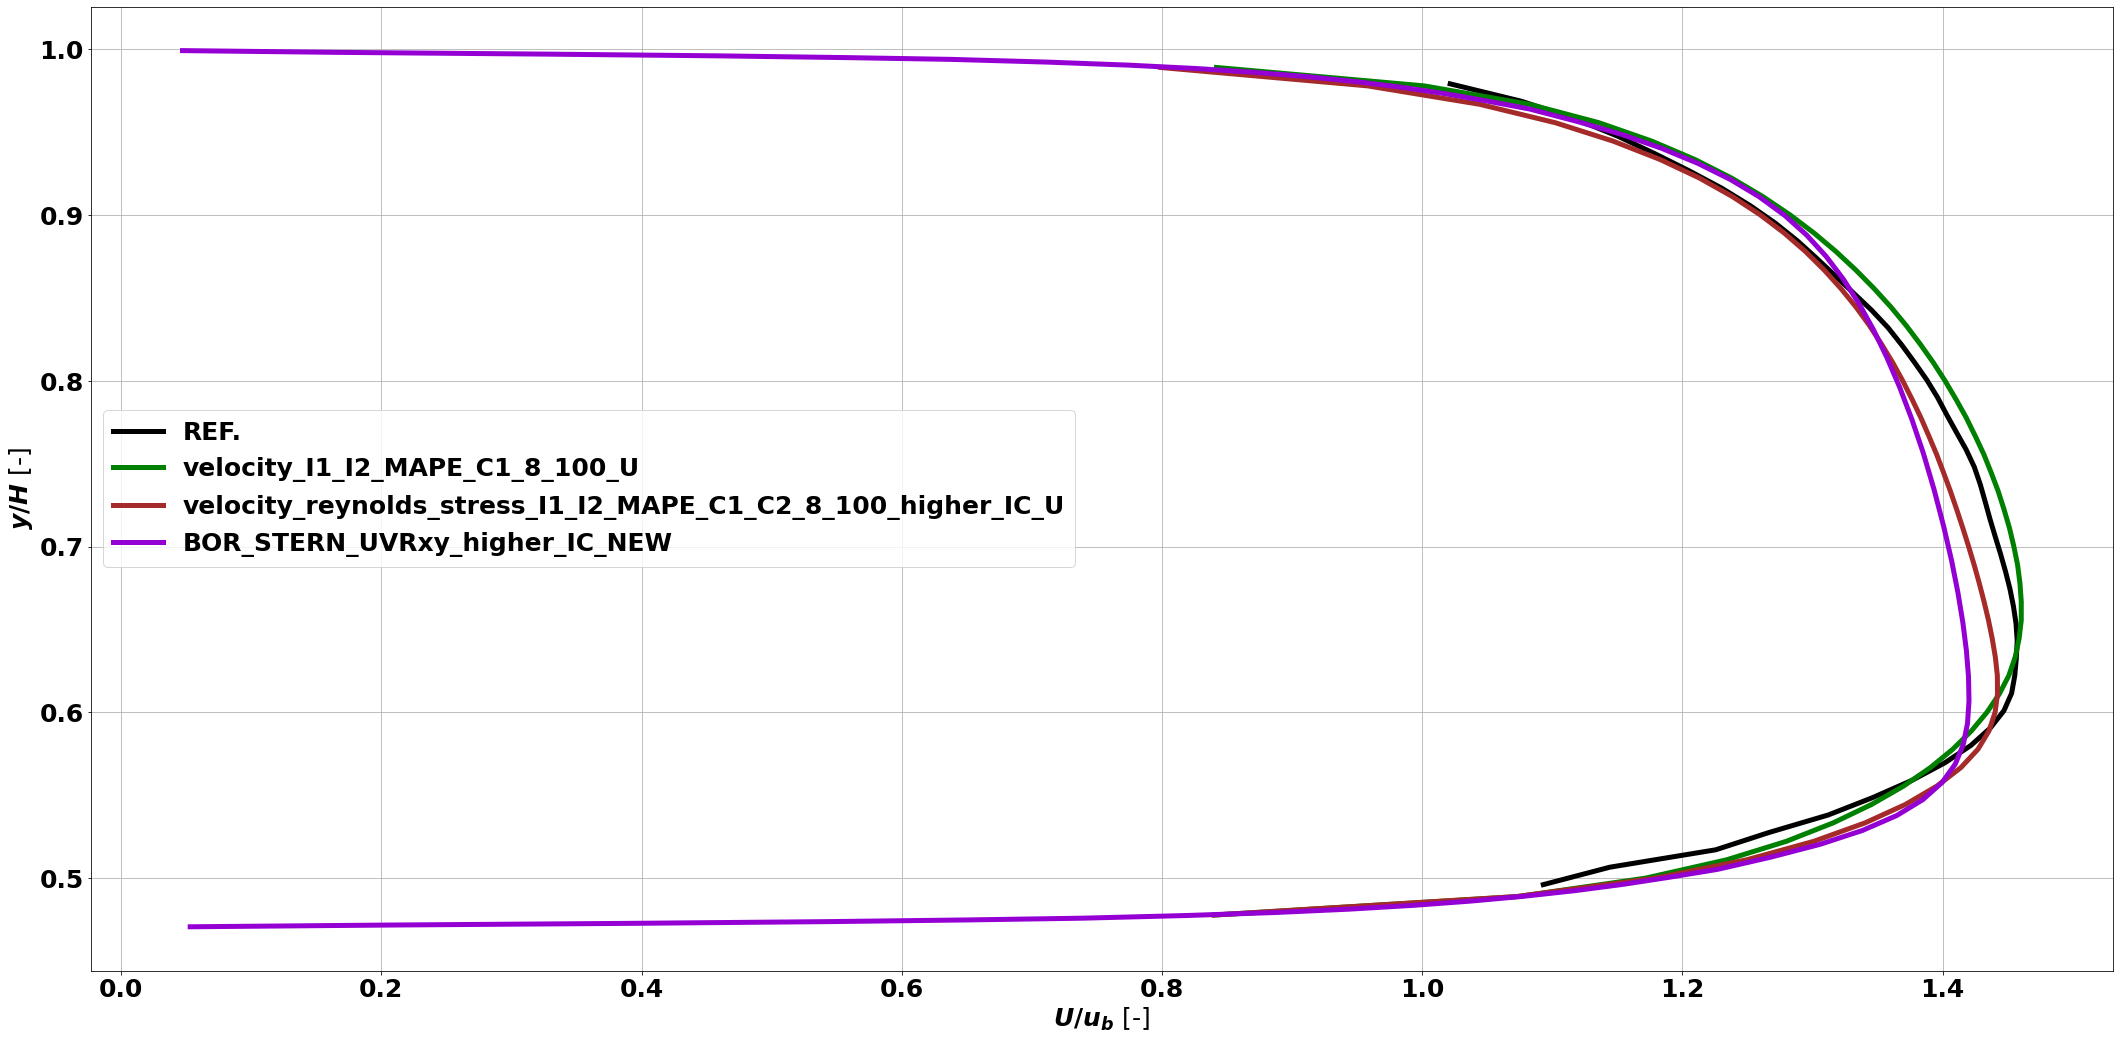

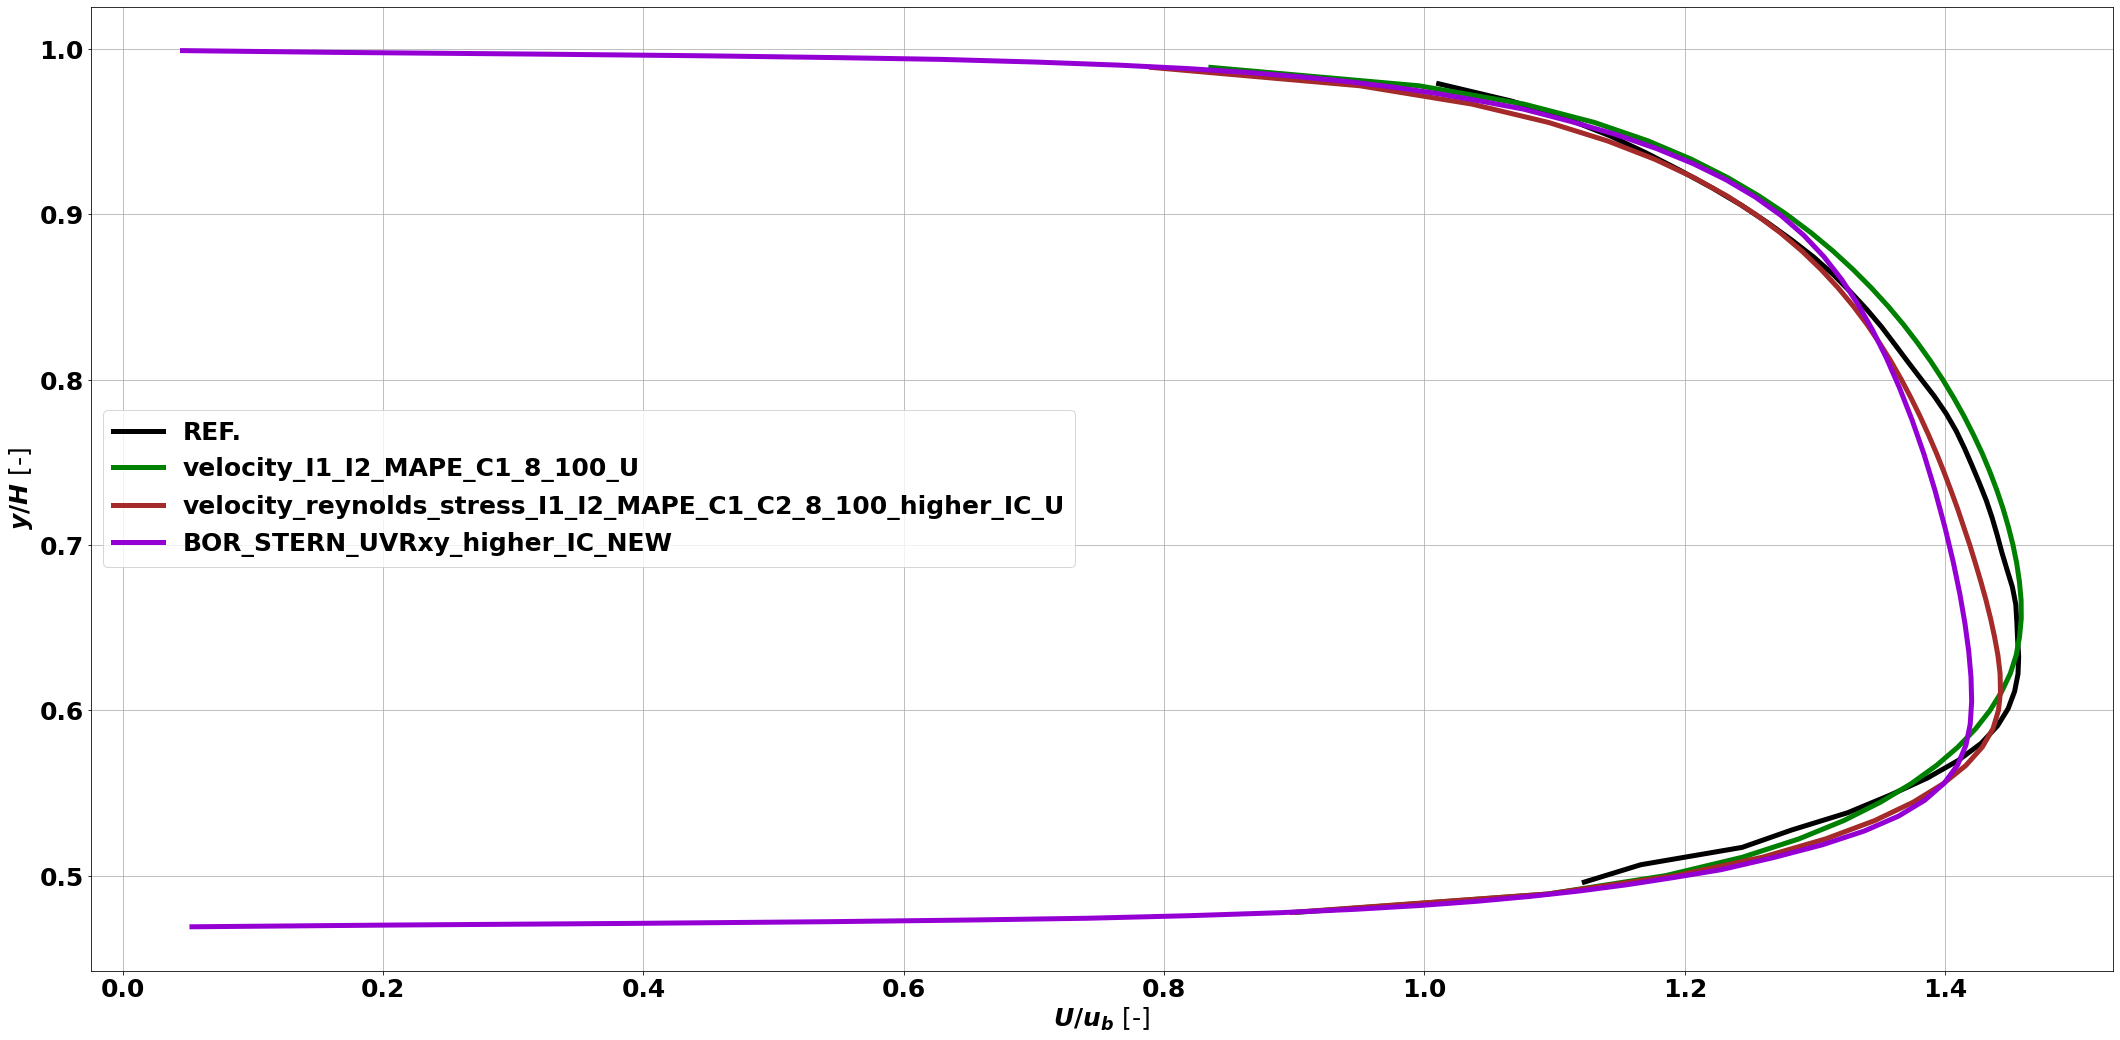

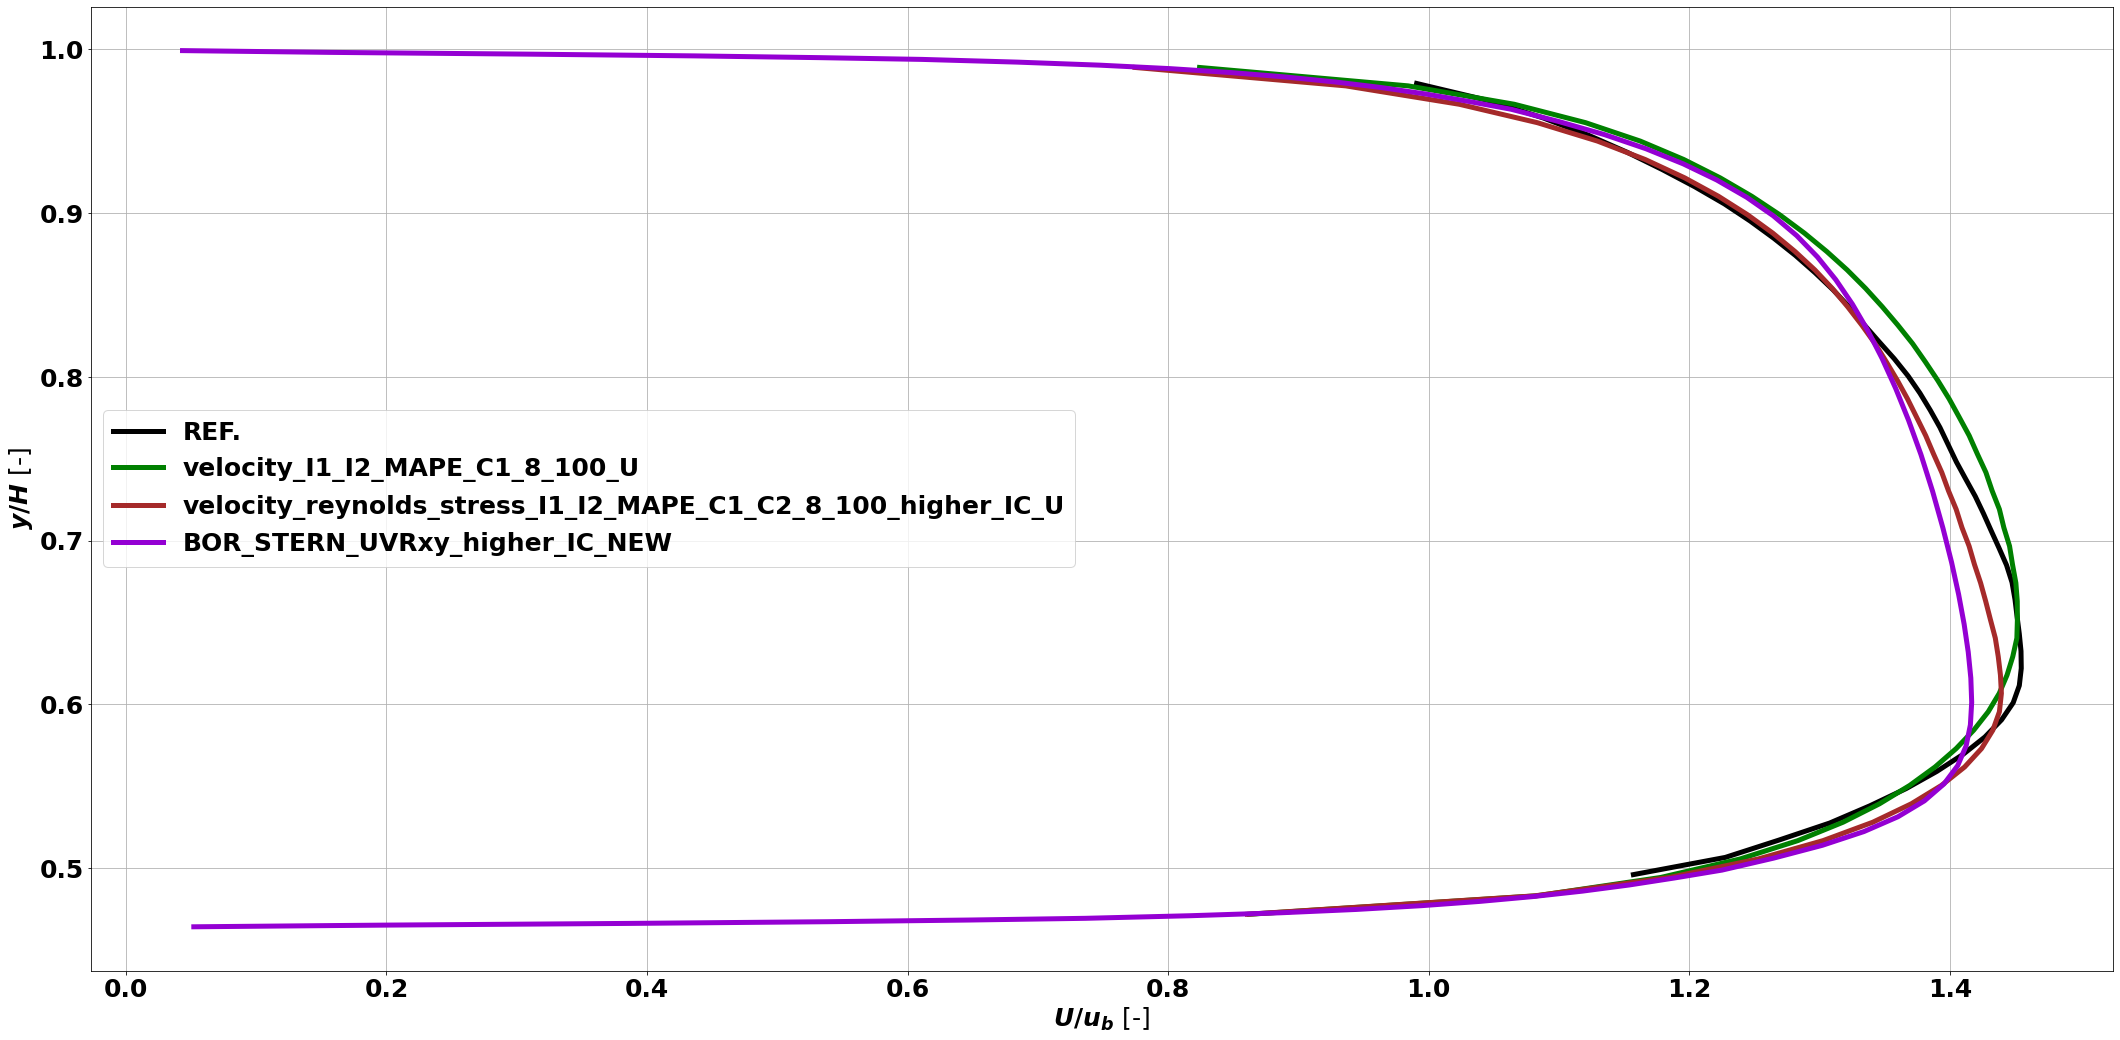

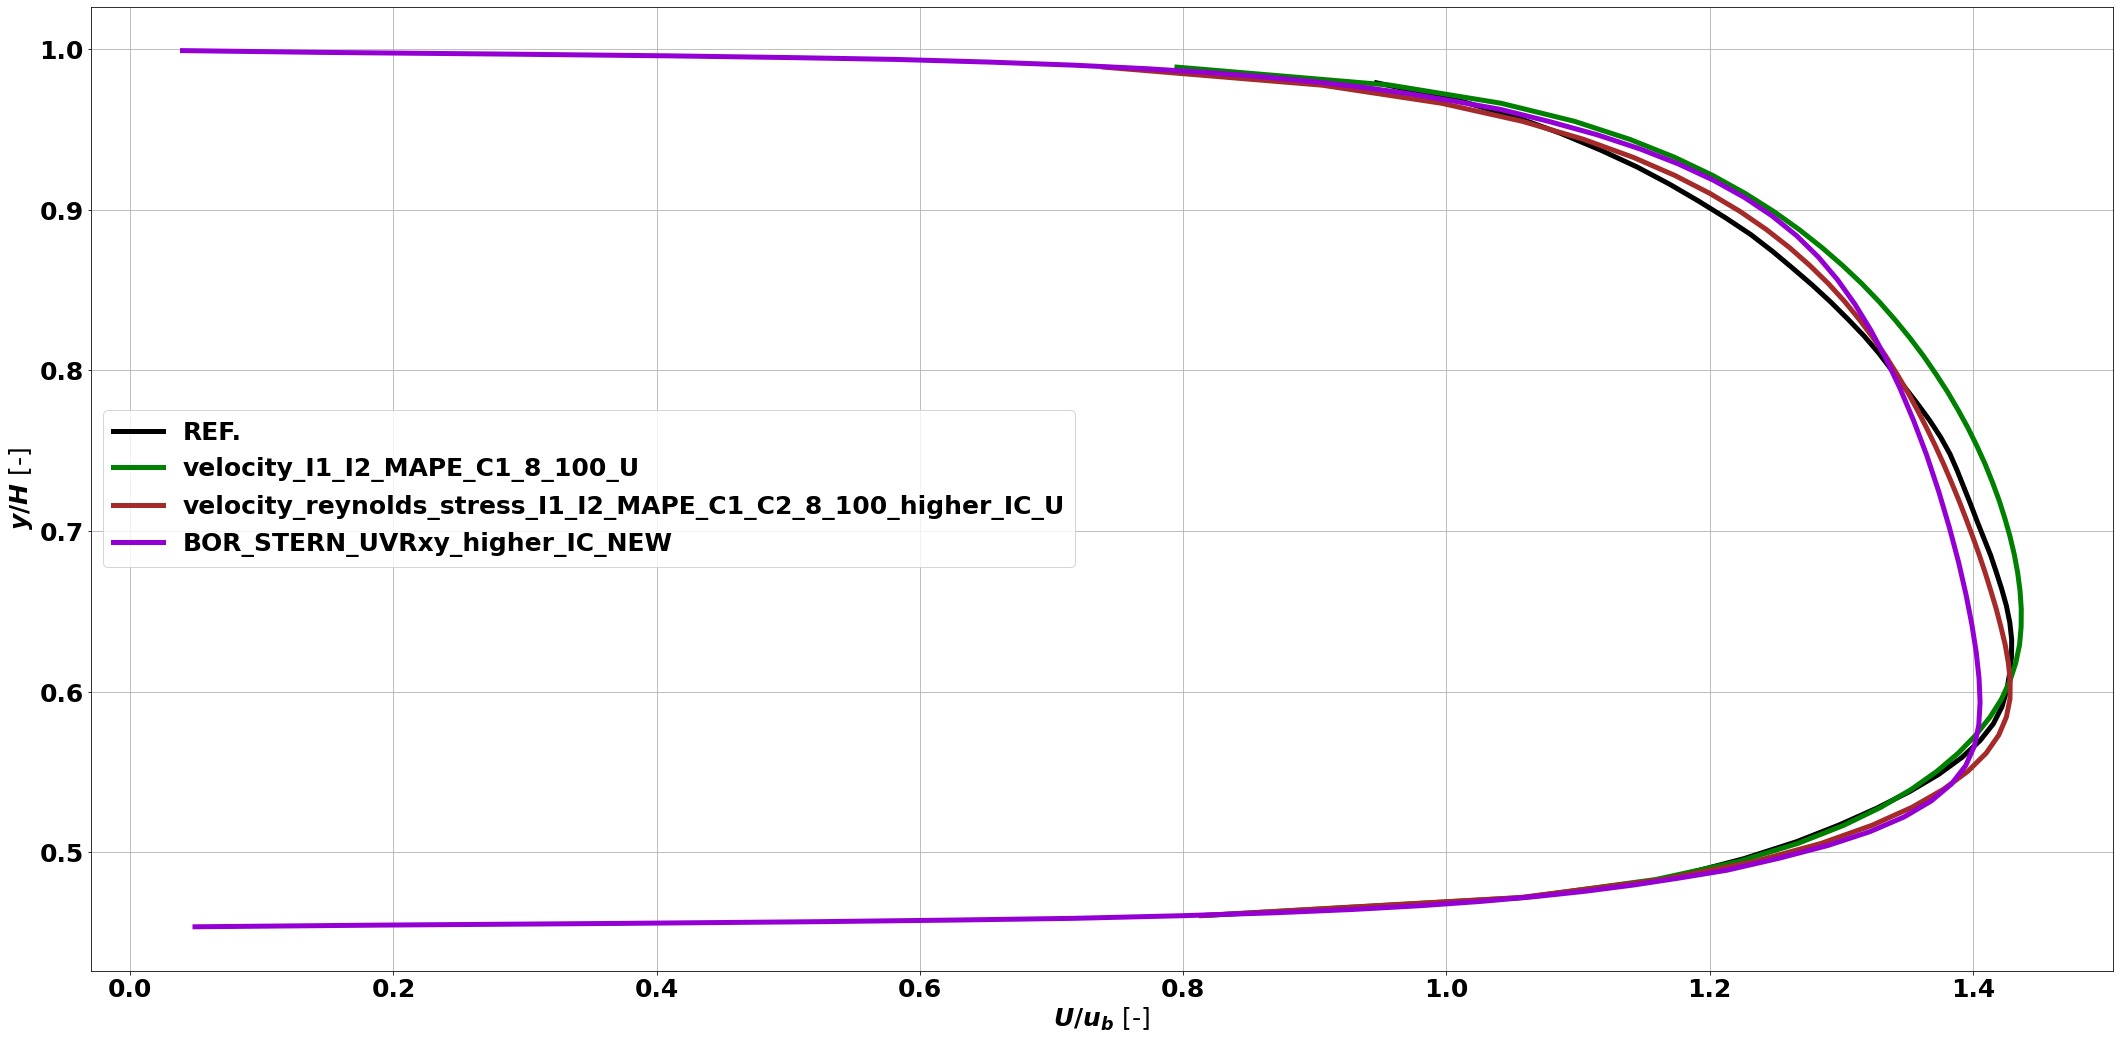

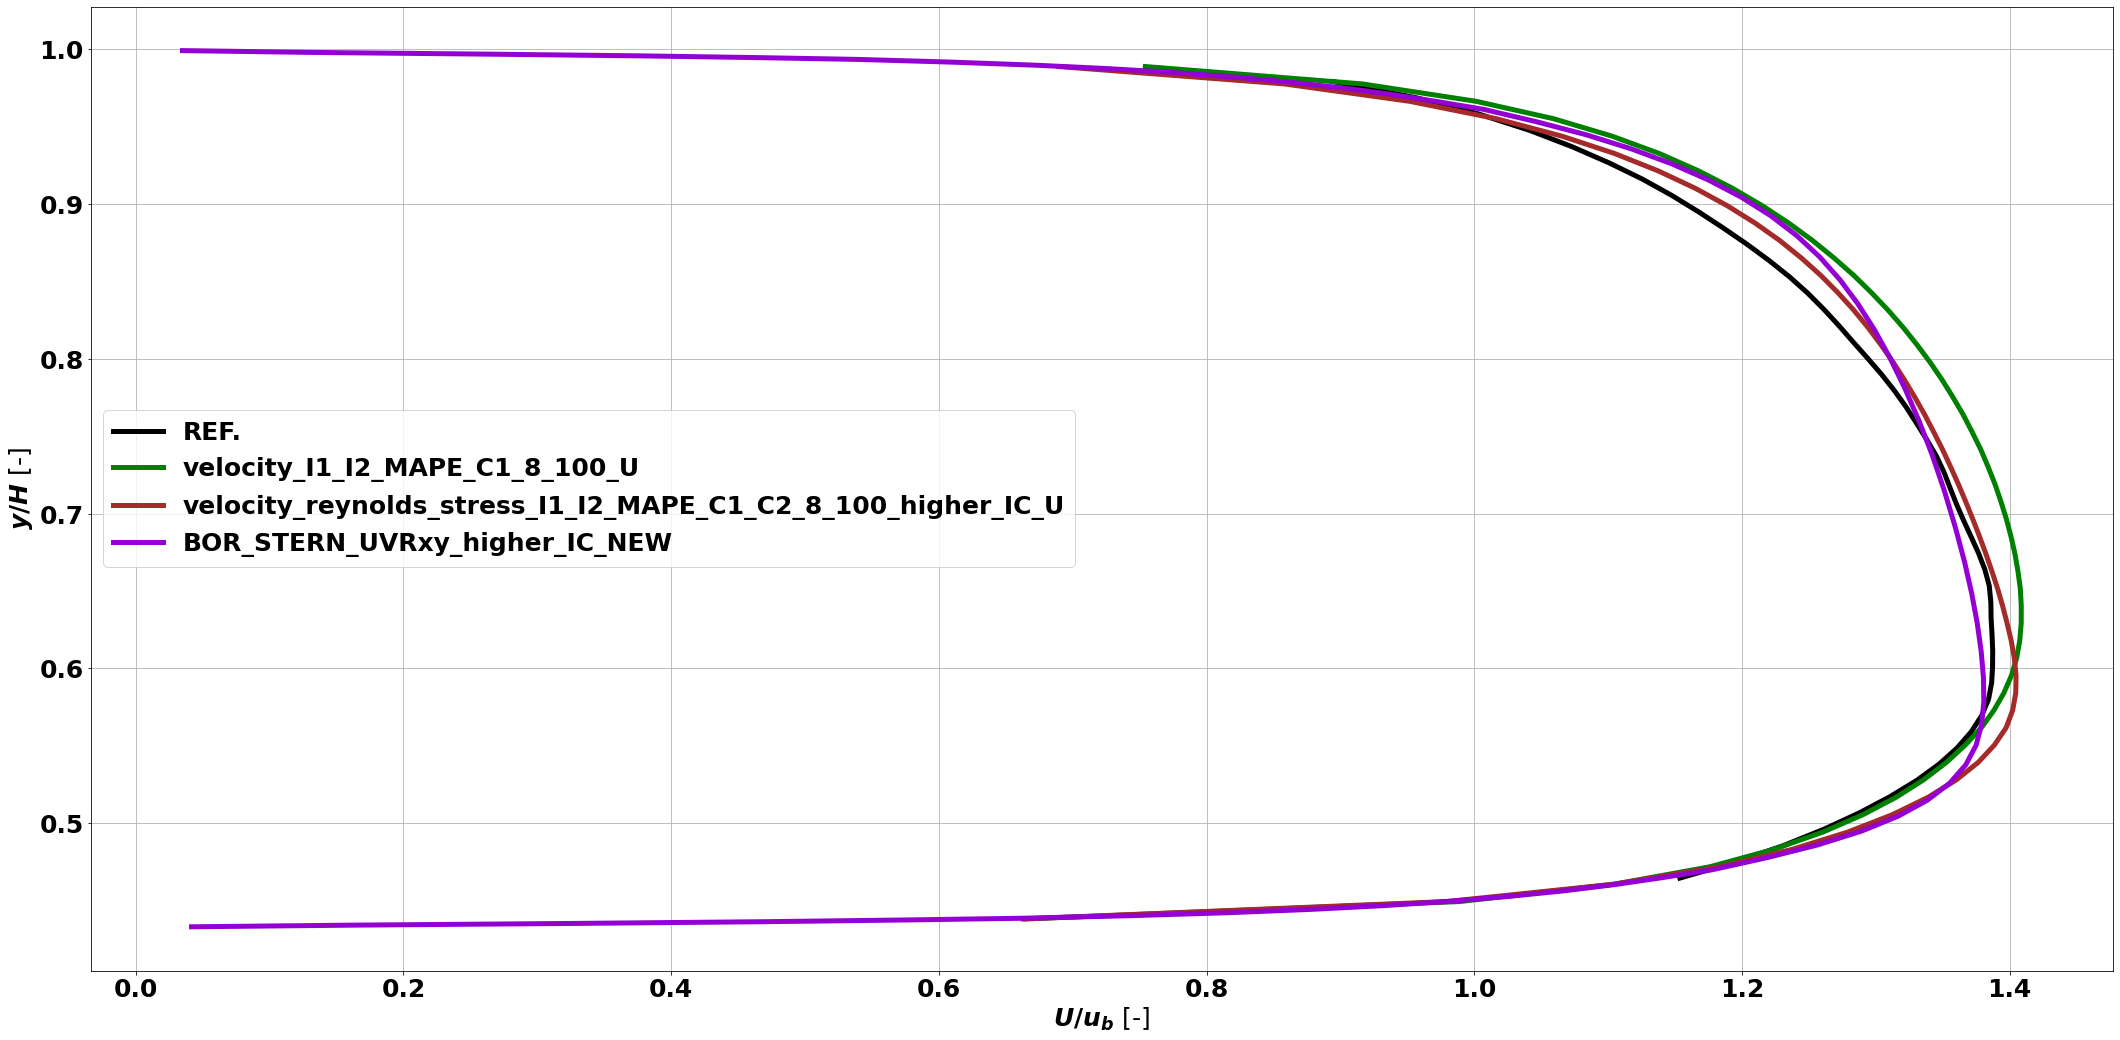

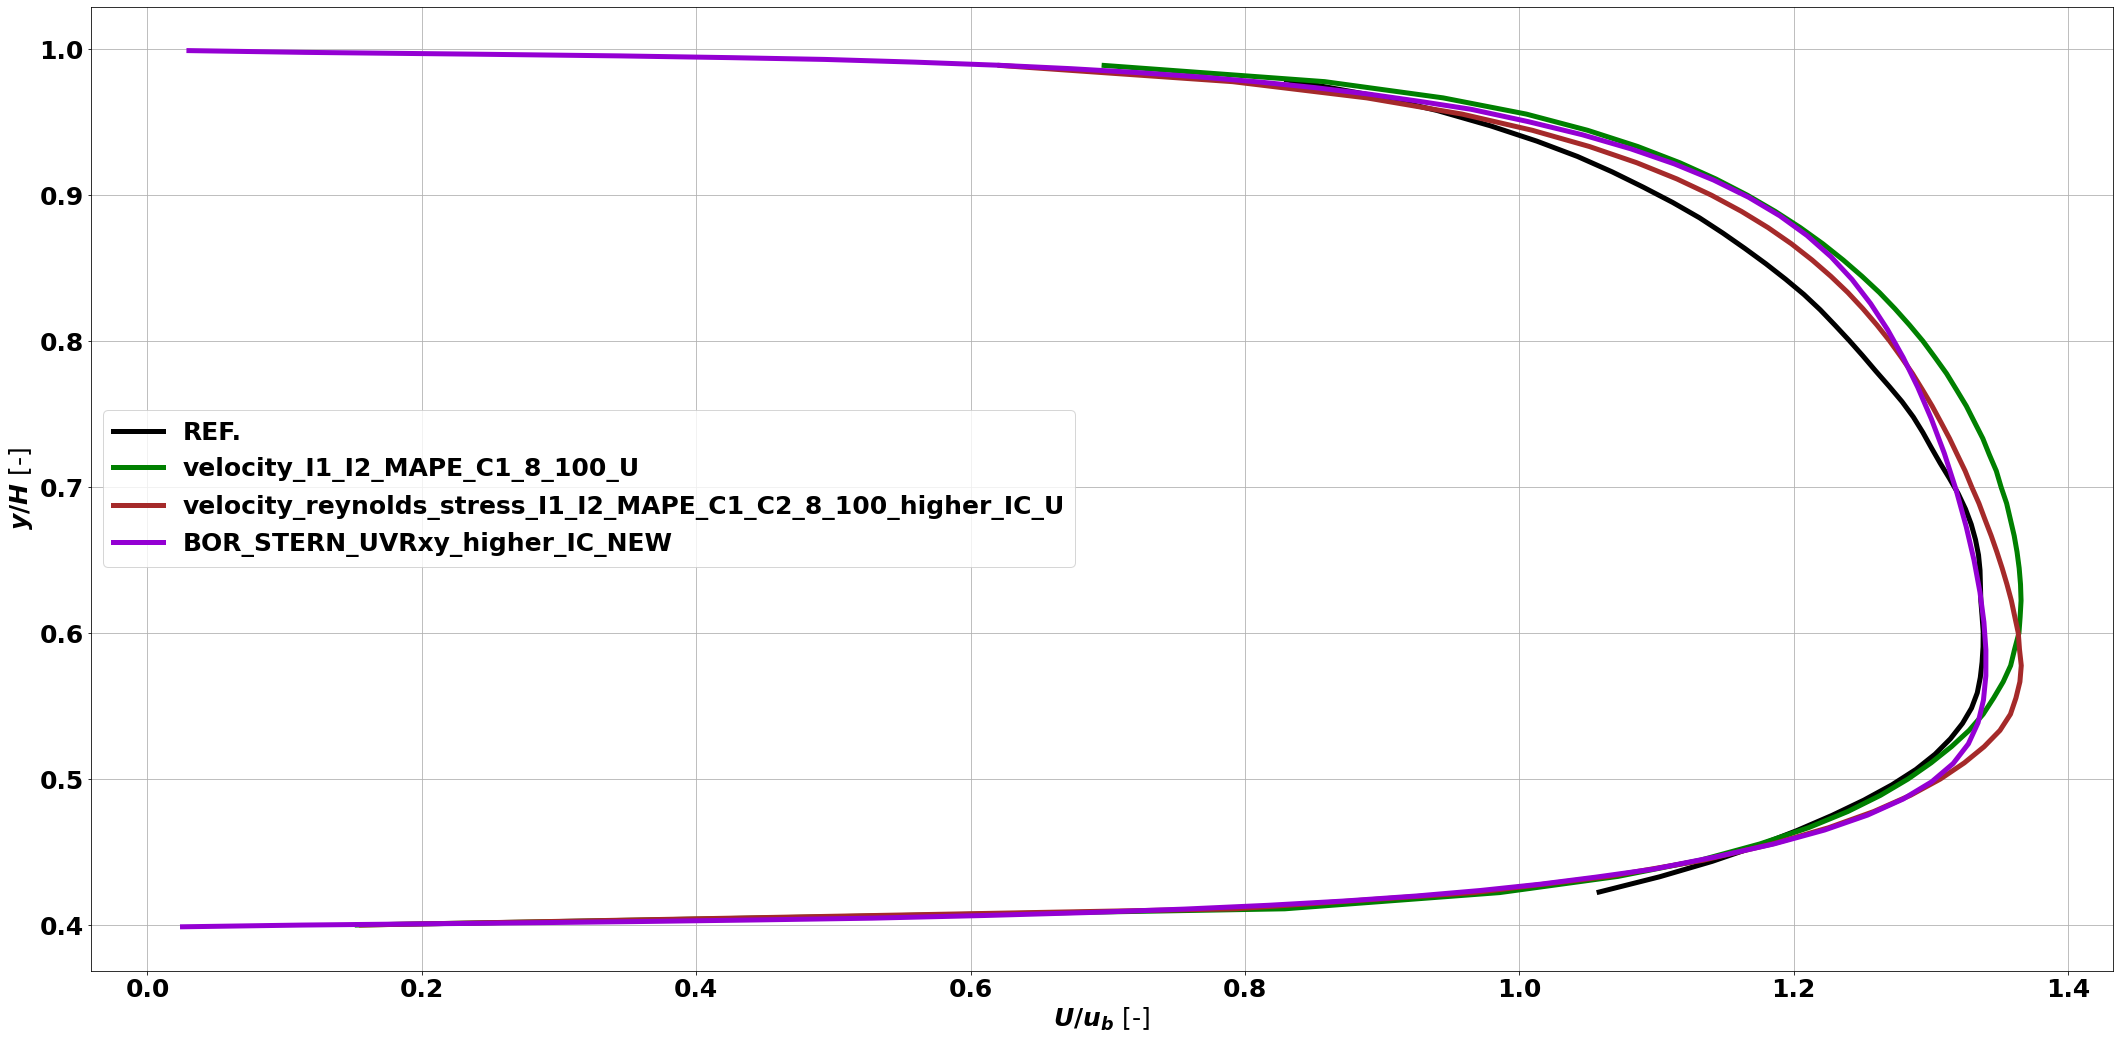

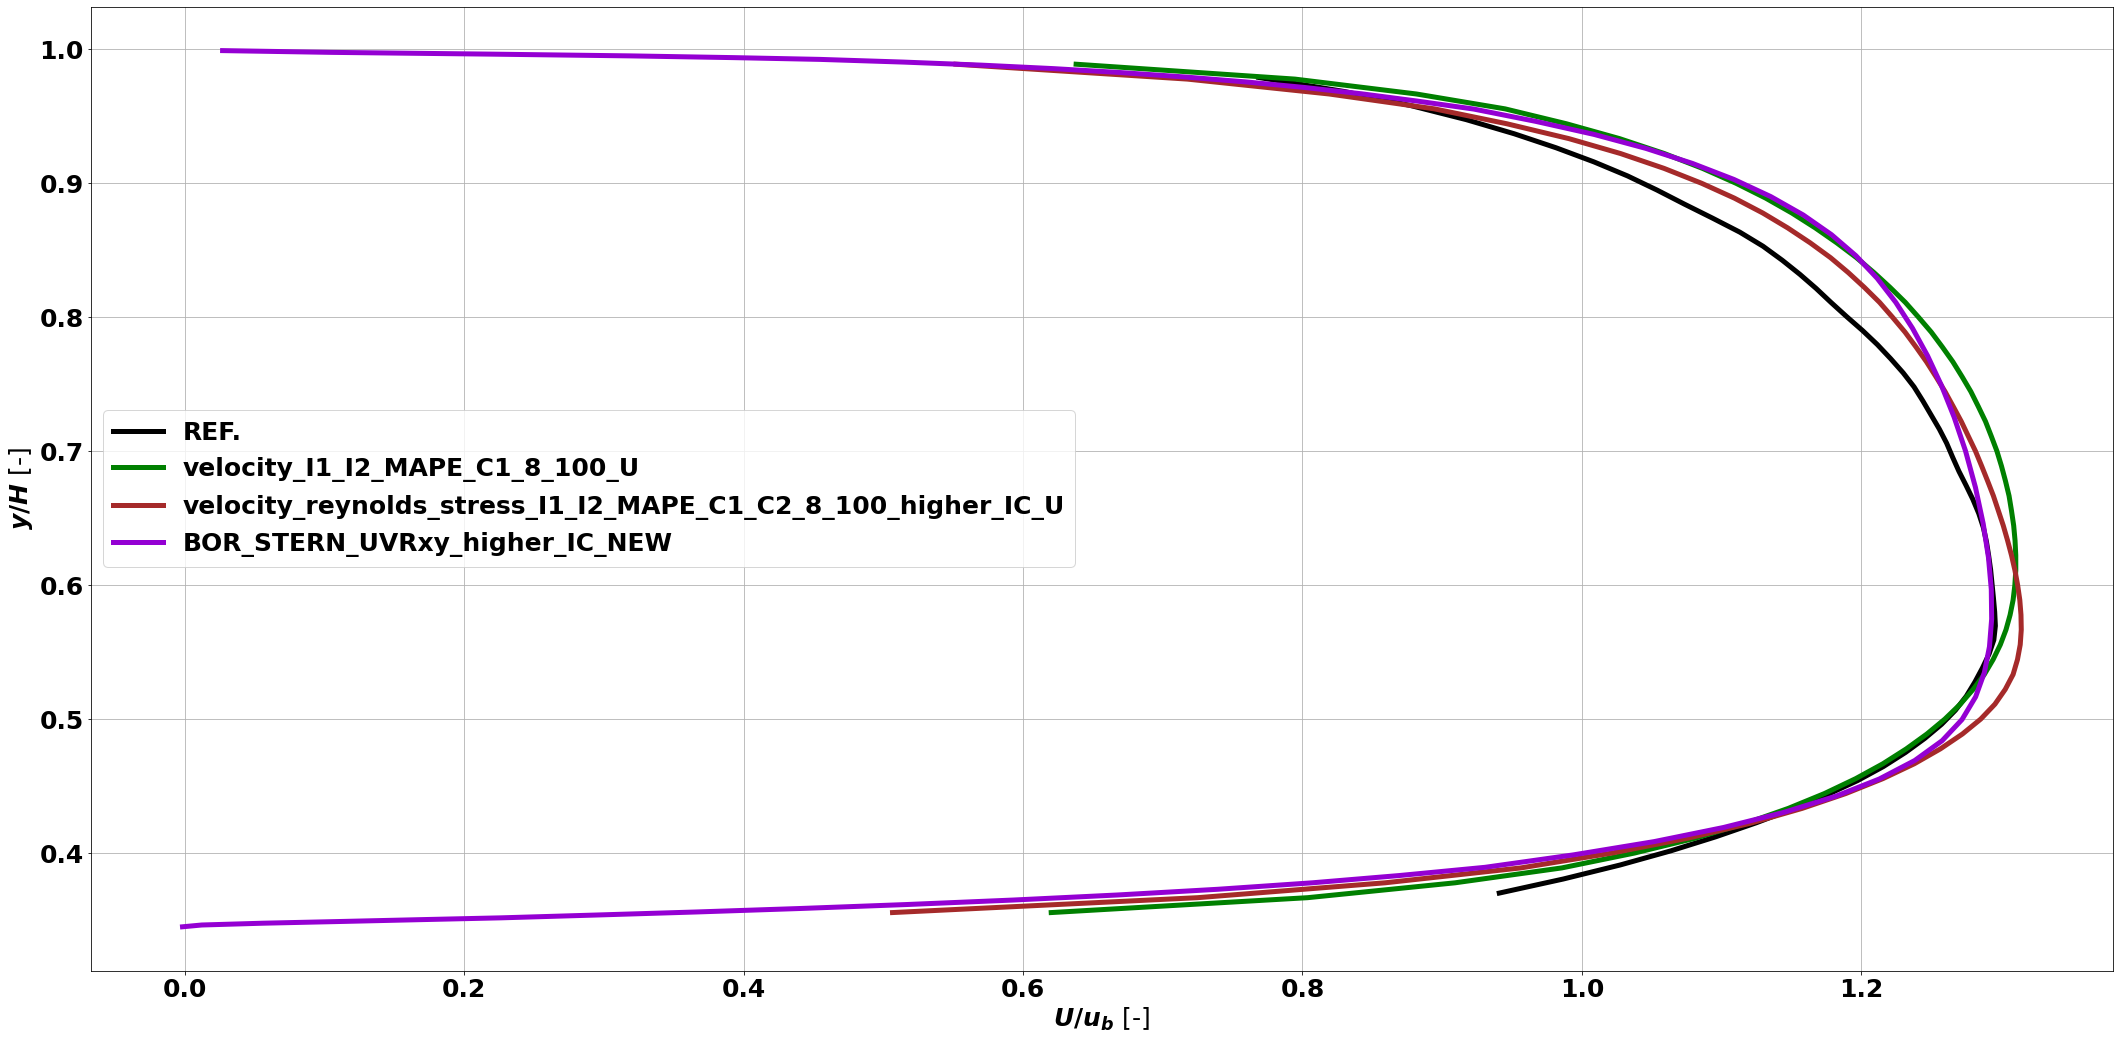

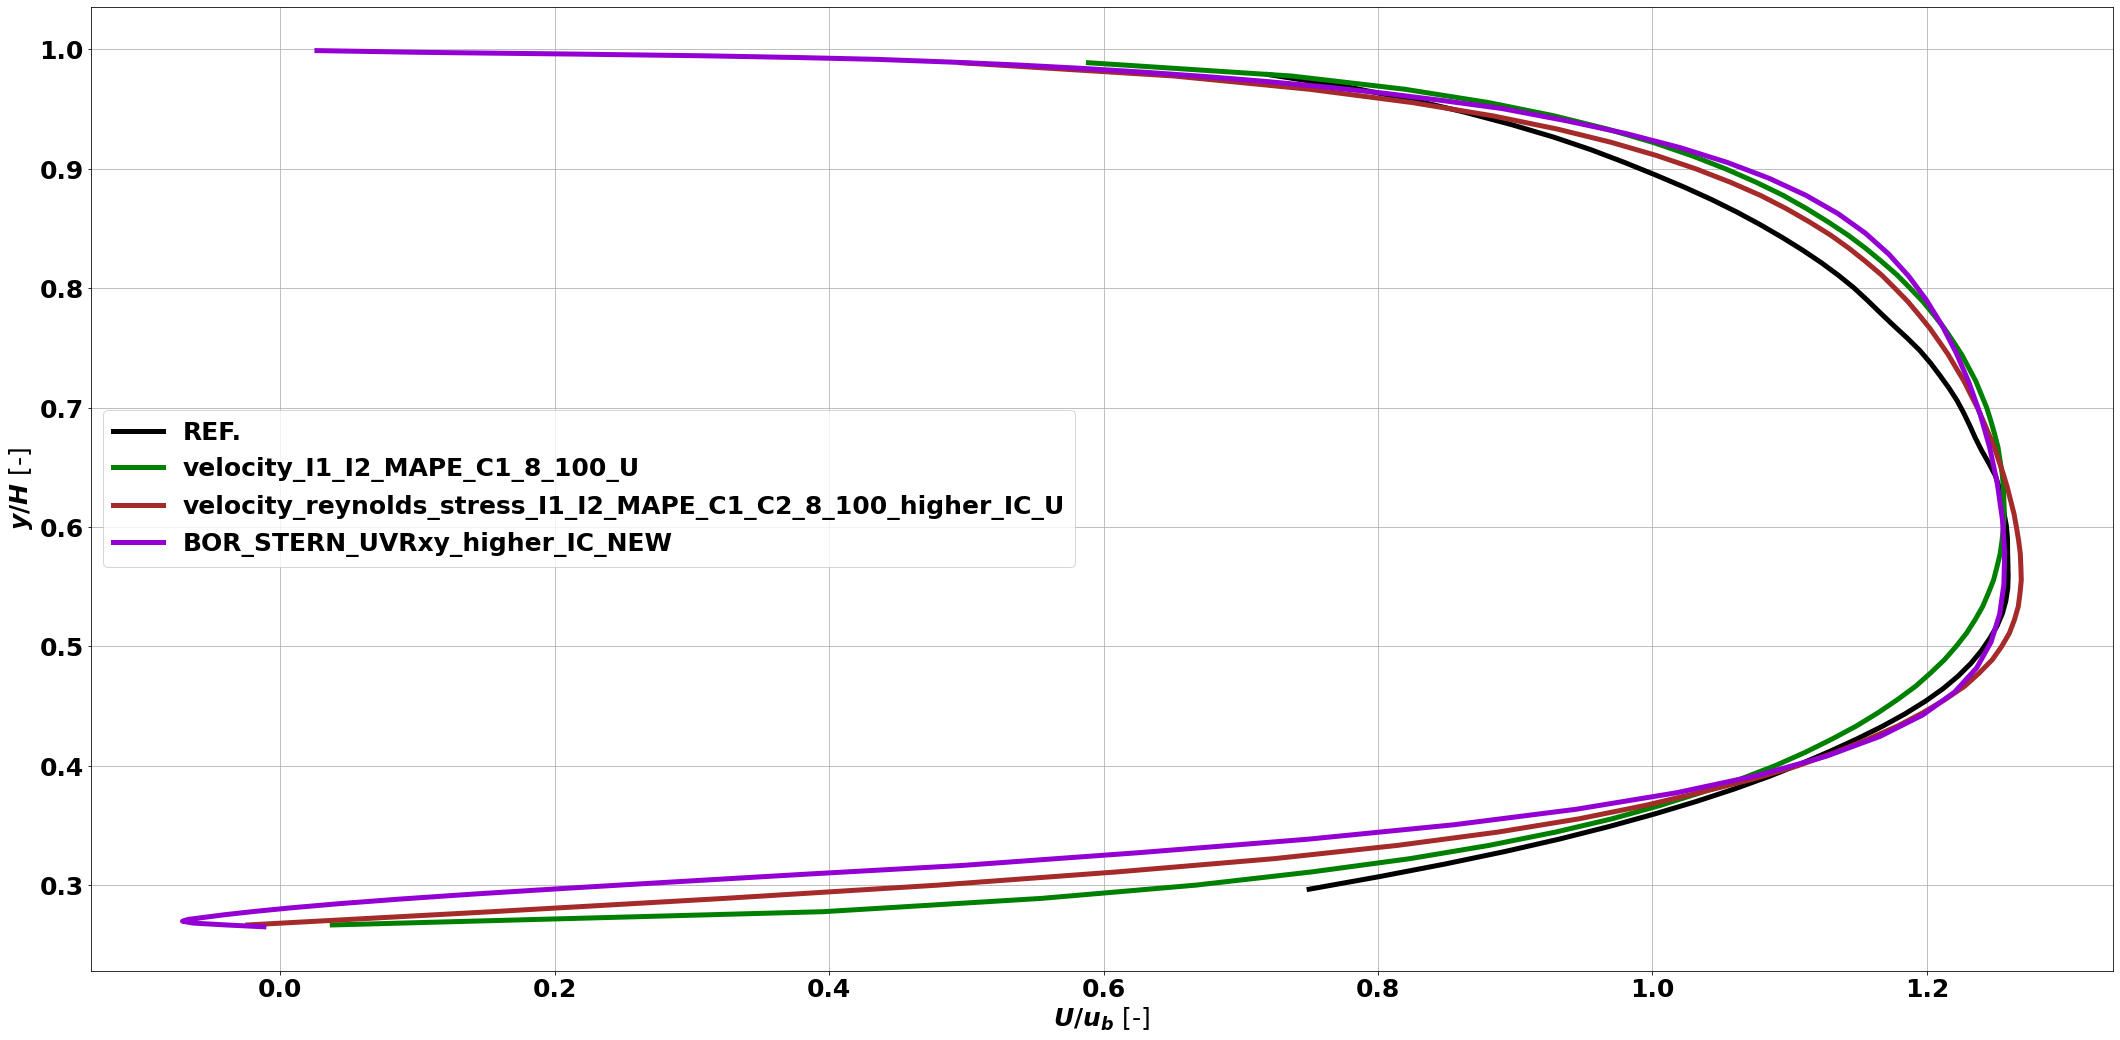

In [155]:
lw = 5
for i in range(0,len(STERN_REF)):
    plt.figure(figsize=(30,15), frameon=False)
    
    plt.plot(BOR_STERN_REF[i][:,3],                                                           BOR_STERN_REF[i][:,1],                                                          c="black",      linewidth=lw, label='REF.')
    #plt.plot(reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1],                reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                c="red",        linewidth=lw, label='reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_8_100_U')
    plt.plot(velocity_I1_I2_MAPE_C1_8_100_U[i][:,1],                                          velocity_I1_I2_MAPE_C1_8_100_U[i][:,0],                                         c="green",      linewidth=lw, label='velocity_I1_I2_MAPE_C1_8_100_U')
    #plt.plot(velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1],                       velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                       c="lime",       linewidth=lw, label='velocity_wall_shear_stress_I1_I2_MAPE_C1_8_100_U')
    #plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U[i][:,1],                         velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                         c="violet",     linewidth=lw, label='velocity_reynolds_stress_I1_I2_MAPE_C1_8_100_U')
    #plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1],                      velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],                      c="pink",       linewidth=lw, label='velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_U')
    plt.plot(velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U[i][:,1]/2.2,         velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U[i][:,0],            c="brown",      linewidth=lw, label='velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC_U')
    #plt.plot(velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U[i][:,1], velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U[i][:,0], c="grey",       linewidth=lw, label='velocity_reynolds_stress_wall_shear_stress_I1_I2_MAPE_C1_C2_C3_8_100_U')
    #plt.plot(velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,1],                    velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U[i][:,0],                    c="purple",     linewidth=lw, label='velocity_wall_shear_stress_I1_I2_MAPE_C1_C2_8_100_U')
    #plt.plot(wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,1],                                wall_shear_stress_I1_I2_MAPE_C1_8_100_U[i][:,0],                                c="red",        linewidth=lw, label='wall_shear_stress_I1_I2_MAPE_C1_8_100_U')  
    
    #plt.plot(BOR_STERN_U[i]['U_0'],                                                          BOR_STERN_U[i]['y'],                                                            c='blue',       linewidth=lw, label='BOR_STERN_U')
    #plt.plot(BOR_STERN_U[i]['U_0'],                                                          BOR_STERN_U[i]['y'],                                                            c='darkgreen',  linewidth=lw, label='BOR_STERN_U') 
    plt.plot(BOR_STERN_UVRxy_higher_IC_NEW[i]['U_0']/2.2,                                     BOR_STERN_UVRxy_higher_IC_NEW[i]['y'],                                          c='darkviolet', linewidth=lw, label='BOR_STERN_UVRxy_higher_IC_NEW')
    
    plt.ylabel("$y/H$ [-]")
    plt.xlabel("$U/u_{b}$ [-]")
    plt.tight_layout()
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()

In [153]:
print('BEST MODEL')
print('==========')
!tail -n 10 ../03_Training/BOR-in-the-loop_STERN/velocity_I1_I2_MAPE_C1_8_100/slurm-41797410.out
print()
print('BEST FIT')
print('========')
!tail -n 1  ../03_Training/BOR-in-the-loop_STERN/velocity_I1_I2_MAPE_C1_8_100/study_log_data_algo1.csv 
#!cat        ../03_Training/BOR-in-the-loop_STERN/velocity_I1_I2_MAPE_C1_8_100/running_pfac150_pop8_seed0/run_best/input_00398

BEST MODEL

After 100 generations, best colony has index 5 and fitness value of 0.028890
Expression: 0 	((2.0-((((-0.15)*(2.0)))+(((-0.15)+(-0.15)))))*(I2*((((0.089)-(((2.0)+(I1)))))*(((0.089)-(0.430))))))
Expression: 1 	((((((0.089)+(-1.0)))+(((-1.0)-(-0.15))))-((((((I2)*(0.089)))-(-0.15)))*(((-0.15)-(-0.15)))))+(((((((-1.0)-(0.430)))+(0.430)))-(((-0.15)+(1.0))))-2.0))
Expression: 2 	((((((((I1)*(1.0)))*(((0.205)+(-0.15)))))-(((0.205)+(-0.15))))-((2.0)+(2.0)))-(((((0.205)+(-0.15)))*(I2))*((1.0)-(I2))))
Expression: 3 	((((((0.430)+(((0.205)+(0.430)))))*(1.0))--0.15)+(((I2)*(((((0.097)-(0.089)))*(0.089))))+((I2)+(((((0.097)*(0.205)))*(0.205))))))
Expression: 4 	((((-1.0)+(I1))*0.430)*(((((((0.430)+(0.430)))-(2.0)))*(I2))+((((I2)+(I1)))*(((0.205)-(-1.0))))))
Expression: 5 	((((I1)-(((((0.097)*(0.089)))-(-1.0))))--0.15)+(((0.089)+(((((0.430)-(0.097)))+(-1.0))))-0.205))
Run ID: 00398
The End.

BEST FIT
100,0.028889599034205238,00398,8,3,4,0.9,0.75,0.45,0.0,0.0,0.0,0.0,0


In [151]:
print('BEST MODEL')
print('==========')
!tail -n 10 ../03_Training/BOR-in-the-loop_STERN/velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC/slurm-43964593.out
print()
print('BEST FIT')
print('========')
!tail -n 1  ../03_Training/BOR-in-the-loop_STERN/velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC/study_log_data_algo1.csv
#!cat       ../03_Training/BOR-in-the-loop_STERN/velocity_reynolds_stress_I1_I2_MAPE_C1_C2_8_100_higher_IC/running_pfac150_pop12_seed0/run_best/input_00342

BEST MODEL

After 100 generations, best colony has index 3 and fitness value of 0.182475
Expression: 0 	((0.089*((((-0.15)+(((0.430)*(I2)))))-(((I1)-(0.430)))))-(1.0*((I2)-(0.430))))
Expression: 1 	((((((-0.15)-(((2.0)+(I2)))))-(0.430))*((((I2)+(((0.097)*(-1.0)))))+(1.0)))+(((((0.097)*(1.0)))-(((0.205)+(0.089))))-I1))
Expression: 2 	((((0.205)-(((((-0.15)*(-0.15)))+(I1))))-0.089)+(2.0+((1.0)-(I2))))
Expression: 3 	((2.0-0.430)+(0.089+((((((0.097)*(-1.0)))-(((-1.0)*(-1.0)))))-(((0.205)*(0.097))))))
Expression: 4 	((1.0+((((I1)*(((0.097)*(I2)))))-(((0.430)+(2.0)))))-(((I1)-(((((0.205)*(0.430)))-(0.089))))*((-0.15)*(((((0.089)*(I1)))-(((0.430)+(0.430))))))))
Expression: 5 	((((I2)-(((((I2)-(0.089)))+(0.430))))-((((((I2)*(I2)))+(I1)))+(-1.0)))*(((0.097)*(((((1.0)*(I1)))+(2.0))))+((0.205)*(((0.430)-(I1))))))
Run ID: 00342
The End.

BEST FIT
100,0.18247481183035846,00342,12,3,6,0.9,0.75,0.45,0.0,0.0,0.0,0.0,0


In [150]:
print('BEST MODEL')
print('==========')
!cat       ../03_Training/BOR_STERN_UVRxy_pop100_gen100_higher_IC_NEW/running_pfac150_pop10_seed0/run_00445/input_00445
print()
print('BEST FIT')
print('========')
!tail -n 1 ../03_Training/BOR_STERN_UVRxy_pop100_gen100_higher_IC_NEW/study_log_data_algo1.csv

BEST MODEL
((I01*2.0)-(I02*2.0))
((((-1.0)*(I02))*((((I02)+(I02)))+(((0.0976270078546495)*(2.0)))))+(((((I02)*(I02)))-(((0.20552675214328775)+(0.08976636599379373))))+((I02)+(((I02)+(((2.0)+(0.08976636599379373))))))))
((((((((0.08976636599379373)-(0.43037873274483895)))-(((0.0976270078546495)-(0.0976270078546495)))))-(((0.08976636599379373)-(-0.15269040132219058))))+1.0)-(I01-((((((-0.15269040132219058)*(0.43037873274483895)))*(0.43037873274483895)))*(1.0))))
((((1.0)-(((((0.08976636599379373)-(0.43037873274483895)))-(0.20552675214328775))))+-1.0)*(((((((I01)-(-1.0)))-(((0.0976270078546495)*(0.20552675214328775)))))*(((I01)+(0.0976270078546495))))*1.0))
((0.08976636599379373*((I01)*(((((I02)-(1.0)))+(I02)))))-(-1.0-I01))
((0.08976636599379373*I02)-(((((((I02)-(0.20552675214328775)))*(((I02)+(1.0)))))*(1.0))+I01))

BEST FIT
100,0.055543550130666974,00445,10,2,5,0.3,0.45,0.45,0.0,0.0,0.0,0.0,0
